# Unsupervised Learning applied to Customer Lifetime Value (CLV)

![](https://wilsonprintingusa.com/wp-content/uploads/2015/02/Customer-Lifetime-Value-Wilson-Printing.jpg)

![](https://wilsonprintingusa.com/wp-content/uploads/2015/02/Customer-Lifetime-Value-Wilson-Printing.jpg)

# Prepare Workspace

In [1]:
# to handle datasets
import numpy as np
import pandas as pd
import datetime

# for plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import autocorrelation_plot

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# dimensionality reductiion
from sklearn.manifold import TSNE

# for statistics
import scipy
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
np.__version__

'1.20.3'

In [3]:
pd.__version__

'1.1.3'

In [4]:
matplotlib.__version__

'3.5.2'

In [5]:
sns.__version__

'0.11.0'

In [6]:
scipy.__version__

'1.6.2'

In [7]:
df = pd.read_csv('AutoInsurance.csv')

# Data set Overview

In [8]:
# Dimensions of data set
print(df.shape)

(9134, 24)


In [9]:
# List types for each attribute
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [10]:
# Take a peek at the first rows of the data
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Data Cleaning & Handling Variables Activity

In [11]:
# Change format Date
df_1 = df.copy()
df_1['Effective_Date'] = pd.to_datetime(df_1['Effective To Date'])

### Handling Missing Values

In [12]:
# Check missing values both to numeric features and categorical features 
missing = df_1.isnull().sum()/df_1.shape[0]*100
missing

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
Effective_Date                   0.0
dtype: float64

In [13]:
# Min Value Effective to Date Policy
df_1['Effective_Date'].min()

Timestamp('2011-01-01 00:00:00')

In [14]:
# Max Value Effective to Date Policy
df_1['Effective_Date'].max()

Timestamp('2011-12-02 00:00:00')

In [15]:
# End of Year (eoy) of the current Effective to Date
df_1['eoy_Effective_Date'] = pd.to_datetime('2011-12-31')

In [16]:
# Days missing to the end of the current year from effective to date
df_1['eoy_missing_days'] = (df_1['eoy_Effective_Date'] - df_1['Effective_Date']).dt.days

In [17]:
# check duplicates
df_1_duplicates = df_1[df_1.duplicated(['Customer'])]

In [18]:
df_1_duplicates

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Effective_Date,eoy_Effective_Date,eoy_missing_days


In [19]:
df_1 = df_1.drop(['Customer','Effective To Date','eoy_Effective_Date'], axis=1)

In [20]:
# Rename some features for a practical use
df_new = df_1.copy()
df_new = df_new.rename(columns={"Customer Lifetime Value":"Customer_Lifetime_Value","Location Code":"Location_Code","Marital Status":"Marital_Status","Monthly Premium Auto":"Monthly_Premium_Auto","Months Since Last Claim":"Months_Since_Last_Claim",
                           "Months Since Policy Inception":"Months_Since_Policy_Inception","Number of Open Complaints":"Number_of_Open_Complaints","Number of Policies":"Number_of_Policies",
                           "Policy Type":"Policy_Type","Renew Offer Type":"Renew_Offer_Type","Sales Channel":"Sales_Channel","Total Claim Amount":"Total_Claim_Amount",
                           "Vehicle Class":"Vehicle_Class","Vehicle Size":"Vehicle_Size"})

# Summary Statistics

In [21]:
# Summarize attribute distributions for data type of variables
obj_cols = [var for var in df_new.columns if df_new[var].dtype=='object']
df_new[obj_cols].describe().T

,count,unique,top,freq
State,9134,5,California,3150
Response,9134,2,No,7826
Coverage,9134,3,Basic,5568
Education,9134,5,Bachelor,2748
EmploymentStatus,9134,5,Employed,5698
Gender,9134,2,F,4658
Location_Code,9134,3,Suburban,5779
Marital_Status,9134,3,Married,5298
Policy_Type,9134,3,Personal Auto,6788
Policy,9134,9,Personal L3,3426


In [22]:
# Summarize attribute distributions for data type of variables
no_obj_cols = [var for var in df_new.columns if df_new[var].dtype!='object']
df_new[no_obj_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Lifetime_Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly_Premium_Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months_Since_Last_Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months_Since_Policy_Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number_of_Open_Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number_of_Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total_Claim_Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
eoy_missing_days,9134.0,276.667068,93.820412,29.000000,244.000000,315.000000,340.000000,364.000000


In [23]:
date_cols = [cname for cname in df_new.columns if 
             df_new[cname].dtype in ['datetime64[ns]']]
date = df_new[date_cols]
date.describe().T

,count,unique,top,freq,first,last
Effective_Date,9134,59,2011-10-01,195,2011-01-01,2011-12-02


In [24]:
# Split data set between target variable and features
X_full = df_new.copy()
y = X_full.Customer_Lifetime_Value
X_full.drop(['Customer_Lifetime_Value'], axis=1, inplace=True)

# Target Variable Analysis

In [25]:
# Univariate analysis looking at Mean, Variance, Standard Deviation, Skewness and Kurtosis
print(y.name,
      '\nMean :', np.mean(y),
      '\nVariance :', np.var(y),
      '\nStandard Deviation :', np.var(y)**0.5, 
      '\nSkewness :', stats.skew(y), 
      '\nKurtosis :', stats.kurtosis(y))

Customer_Lifetime_Value 
Mean : 8004.940474987081 
Variance : 47205027.252813585 
Standard Deviation : 6870.591477654131 
Skewness : 3.0317822713278852 
Kurtosis : 13.815310695287444


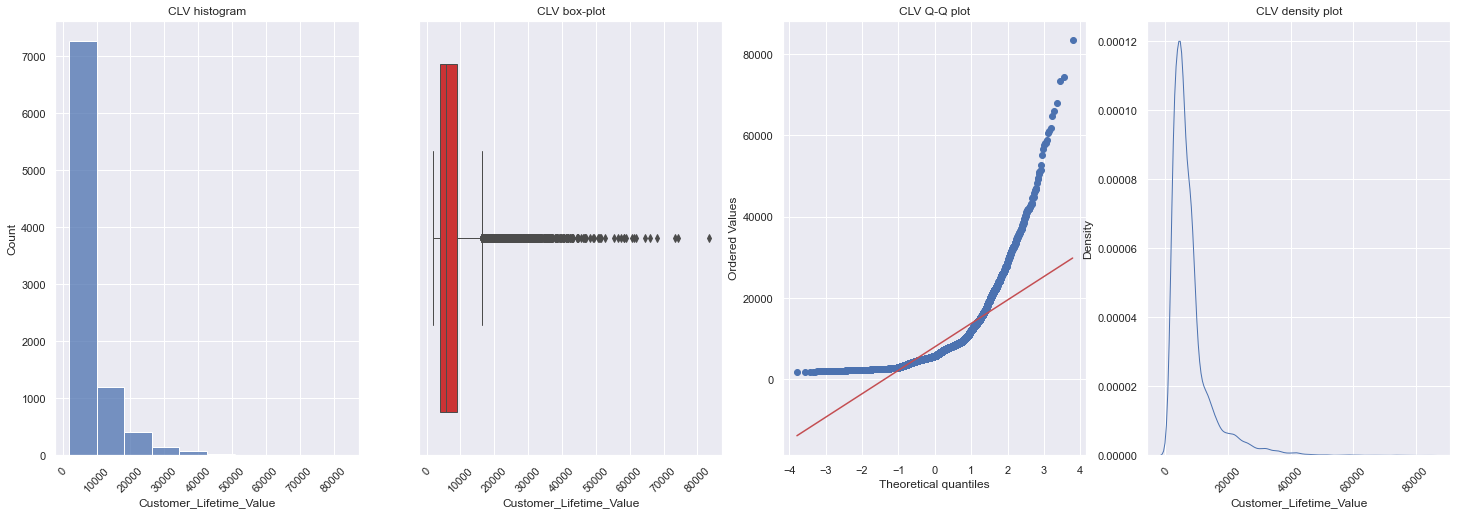

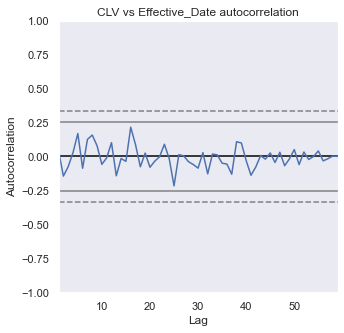

In [26]:
# Univariate analysis with density plots and histogram
sns.set(rc = {'figure.figsize': (25, 8)})
plt.subplot(1,4,1)  
sns.histplot(df_new['Customer_Lifetime_Value'], bins=10)
plt.xticks(rotation=45)
plt.title('CLV histogram')
# Univariate analysis with box-plots
plt.subplot(1,4,2)
sns.boxplot(df_new['Customer_Lifetime_Value'],palette="Set1",linewidth=1)
plt.xticks(rotation=45)
plt.title('CLV box-plot')
# Univariate analysis with QQ-plot
plt.subplot(1,4,3)  
res = stats.probplot(y, plot=plt)
plt.title('CLV Q-Q plot')
# Univariate analysis with density plot
plt.subplot(1,4,4)
sns.kdeplot(df_new['Customer_Lifetime_Value'],palette="Set1",linewidth=1)
plt.xticks(rotation=45)
plt.title('CLV density plot') 
df_t = df_new.groupby(['Effective_Date'], as_index=False)['Customer_Lifetime_Value'].sum()
df_clv = pd.DataFrame(df_t).set_index('Effective_Date')
fig = plt.figure(figsize = (5,5))
# autocorrelation plot CLV
autocorrelation_plot(df_clv)
plt.title("CLV vs Effective_Date autocorrelation") 
plt.show()

In [27]:
df_month = df_new.copy()
df_month['month'] = pd.DatetimeIndex(df_month['Effective_Date']).month
# groupby month 
df_month_ = df_month.groupby(['month'], as_index=False)['Customer_Lifetime_Value'].sum()
df_month_['PERCENTAGE'] = df_month_['Customer_Lifetime_Value']/df_month_['Customer_Lifetime_Value'].sum()*100
# dropping not matching rows
df_month_ = df_month_.dropna()
# ranking month 
df_month_clv = df_month_.sort_values(['Customer_Lifetime_Value'], ascending = False).reset_index(drop=True)
variable = 'month'
print('Top {} with the most Customer_Lifetime_Value'.format(variable))
df_month_clv.head(12).style.background_gradient(cmap='winter').format({'PERCENTAGE': "{:.2f}"}).format({'Customer_Lifetime_Value':"{:,.2f}"})


Top month with the most Customer_Lifetime_Value


,month,Customer_Lifetime_Value,PERCENTAGE
0,1,"27,465,144.97",37.56
1,2,"21,607,247.52",29.55
2,10,"2,737,806.65",3.74
3,11,"2,601,649.84",3.56
4,5,"2,546,155.61",3.48
5,3,"2,460,476.93",3.37
6,7,"2,398,846.49",3.28
7,6,"2,386,698.89",3.26
8,12,"2,268,604.26",3.10
9,8,"2,255,473.06",3.08


Top month with the most Customer_Lifetime_Value


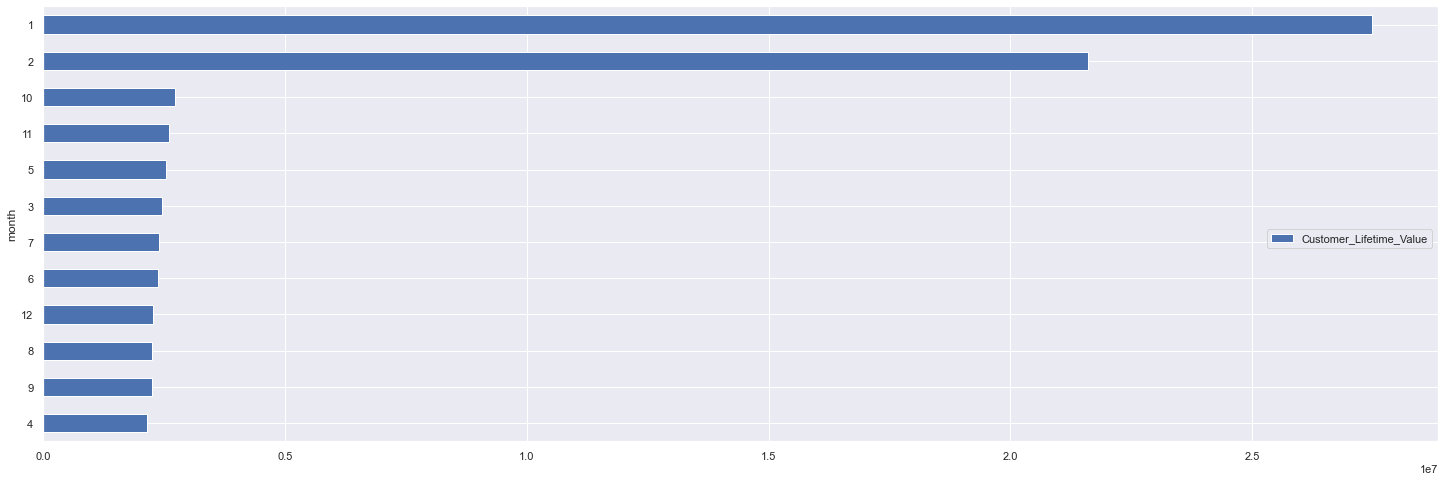

In [28]:
# barplot Top month 
month_ = df_month_clv[['month','Customer_Lifetime_Value']][0:12].sort_values(by = "Customer_Lifetime_Value", ascending = True).set_index('month').plot.barh()
variable = 'month'
print('Top {} with the most Customer_Lifetime_Value'.format(variable))
plt.xticks(rotation=0)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


# Numerical Features Analysis

### Analysis for numerical features (univariate analysis, bivariate analysis)

In [29]:
# Select numerical columns
numerical_cols = [cname for cname in X_full.columns if 
                X_full[cname].dtype in ['float64','int64']]

In [30]:
# Subset with numerical features
num = X_full[numerical_cols]
num.columns

Index(['Income', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Number_of_Open_Complaints',
       'Number_of_Policies', 'Total_Claim_Amount', 'eoy_missing_days'],
      dtype='object')

In [31]:
# list of numerical features
fnum = ['Income', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Number_of_Open_Complaints',
       'Number_of_Policies', 'Total_Claim_Amount', 'eoy_missing_days']

In [32]:
# Univariate analysis looking at Mean, Standard Deviation, Skewness and Kurtosis
for col in fnum:
    print(col,
        '\nMean :', np.mean(num[col]),  
        '\nVariance :', np.var(num[col]),
        '\nStandard Deviation :', np.var(num[col])**0.5, 
        '\nSkewness :', stats.skew(num[col]), 
        '\nKurtosis :', stats.kurtosis(num[col]))

Income 
Mean : 37657.38000875848 
Variance : 922837567.3402659 
Standard Deviation : 30378.241676243637 
Skewness : 0.28684016057807576 
Kurtosis : -1.094383828097193
Monthly_Premium_Auto 
Mean : 93.21929056273265 
Variance : 1183.77860313147 
Standard Deviation : 34.40608380986522 
Skewness : 2.123197701864424 
Kurtosis : 6.189558258832852
Months_Since_Last_Claim 
Mean : 15.097000218962119 
Variance : 101.45938885548495 
Standard Deviation : 10.072705140898593 
Skewness : 0.2785405598366762 
Kurtosis : -1.0737368448075961
Months_Since_Policy_Inception 
Mean : 48.064593825268226 
Variance : 778.6590638978643 
Standard Deviation : 27.904463153729804 
Skewness : 0.040158365343045704 
Kurtosis : -1.1330825805856537
Number_of_Open_Complaints 
Mean : 0.38438800087584846 
Variance : 0.828707436930687 
Standard Deviation : 0.9103336953725744 
Skewness : 2.7828059596647505 
Kurtosis : 7.744410297233042
Number_of_Policies 
Mean : 2.9661703525290126 
Variance : 5.712343621516475 
Standard Deviat

<Figure size 360x360 with 0 Axes>

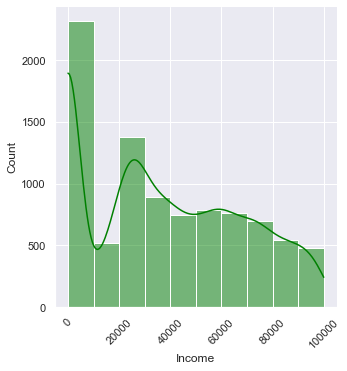

<Figure size 360x360 with 0 Axes>

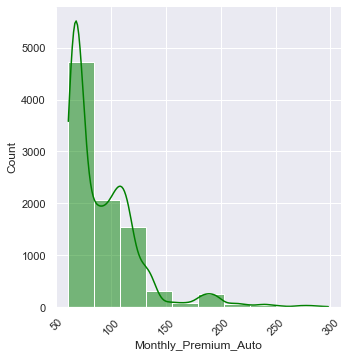

<Figure size 360x360 with 0 Axes>

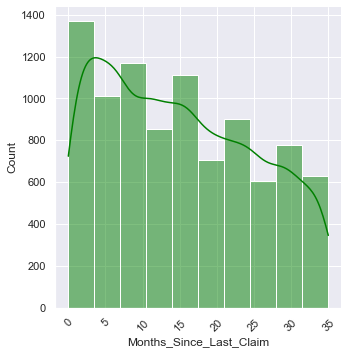

<Figure size 360x360 with 0 Axes>

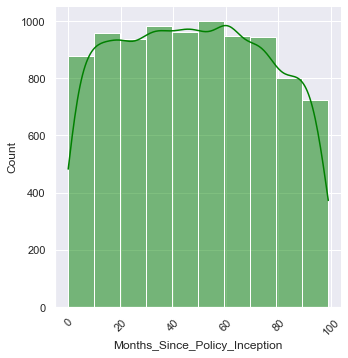

<Figure size 360x360 with 0 Axes>

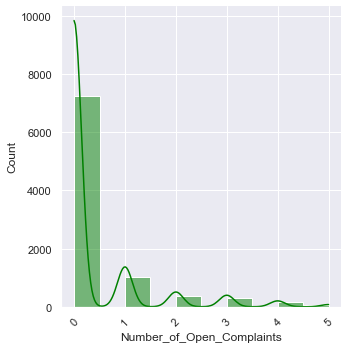

<Figure size 360x360 with 0 Axes>

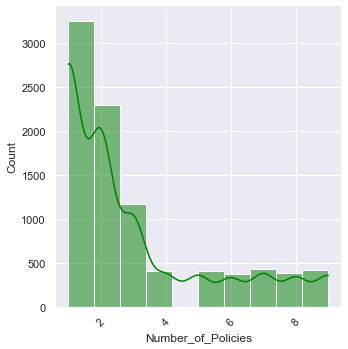

<Figure size 360x360 with 0 Axes>

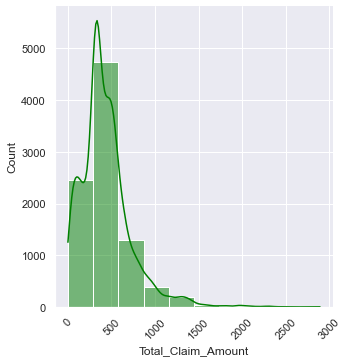

<Figure size 360x360 with 0 Axes>

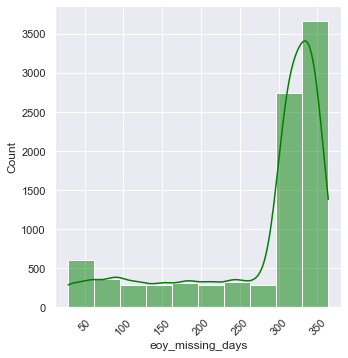

In [33]:
# Univariate analysis with density plots and histograms

for col in fnum:
    plt.figure(figsize=(5,5))
    sns.displot(x=num[col], bins=10, color='green', kde=True)
    plt.xticks(rotation=45)
    plt.show()

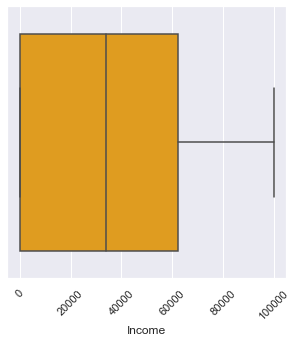

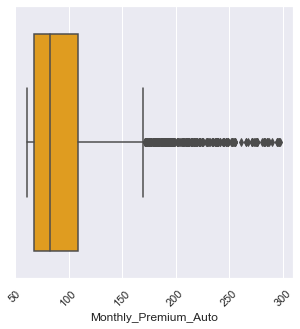

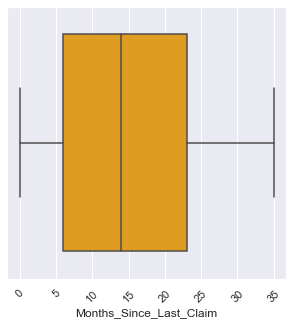

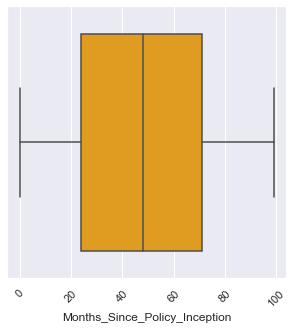

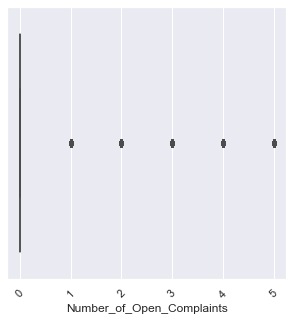

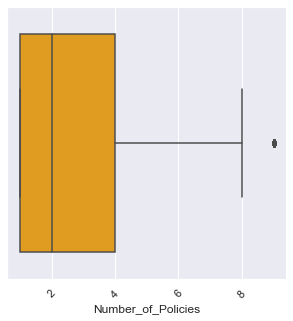

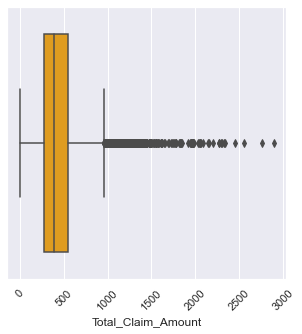

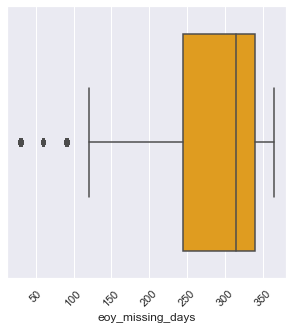

In [34]:
# Univariate analysis with box-plots
for col in fnum:
    plt.figure(figsize=(5,5))
    sns.boxplot(x=num[col], color="orange")
    plt.xticks(rotation=45)
    plt.show()

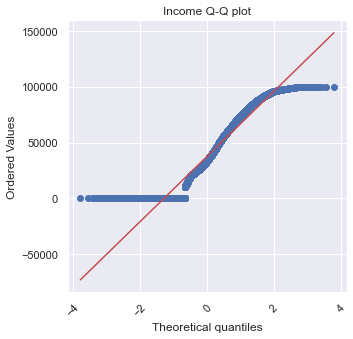

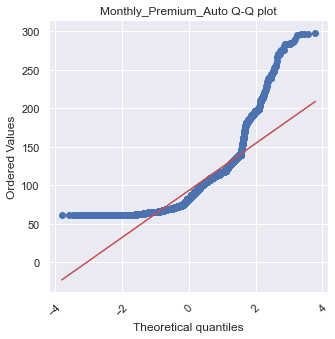

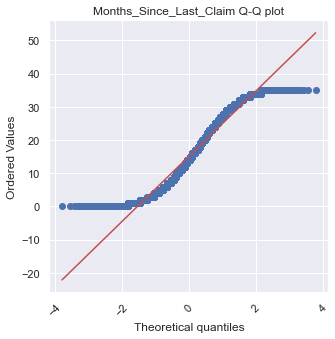

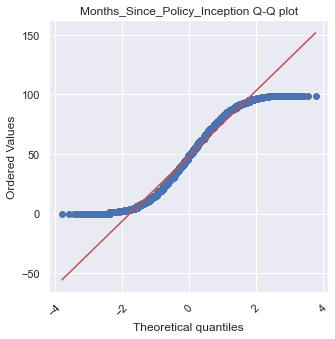

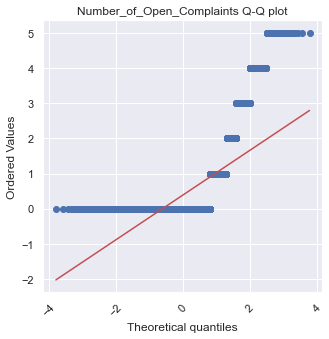

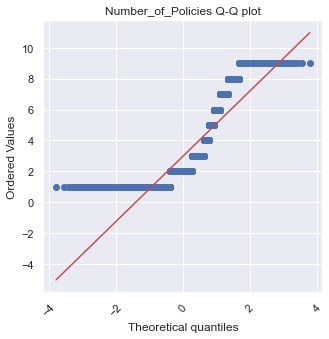

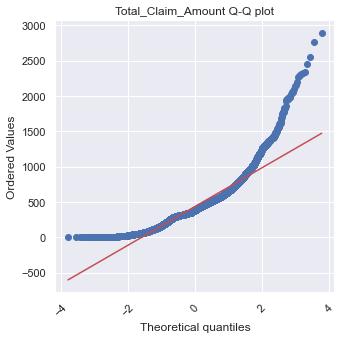

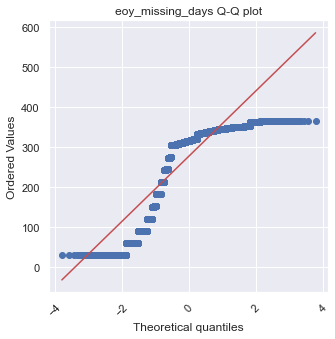

In [35]:
# Univariate analysis with Q-Q plot
for col in fnum:
    plt.figure(figsize=(5,5))
    res = stats.probplot(num[col], plot=plt)
    plt.title('{} Q-Q plot'.format(col))
    plt.xticks(rotation=45)
    plt.show()

In [36]:
# new subset for a bivariate analysis
num2 = pd.concat([y,num], axis=1)

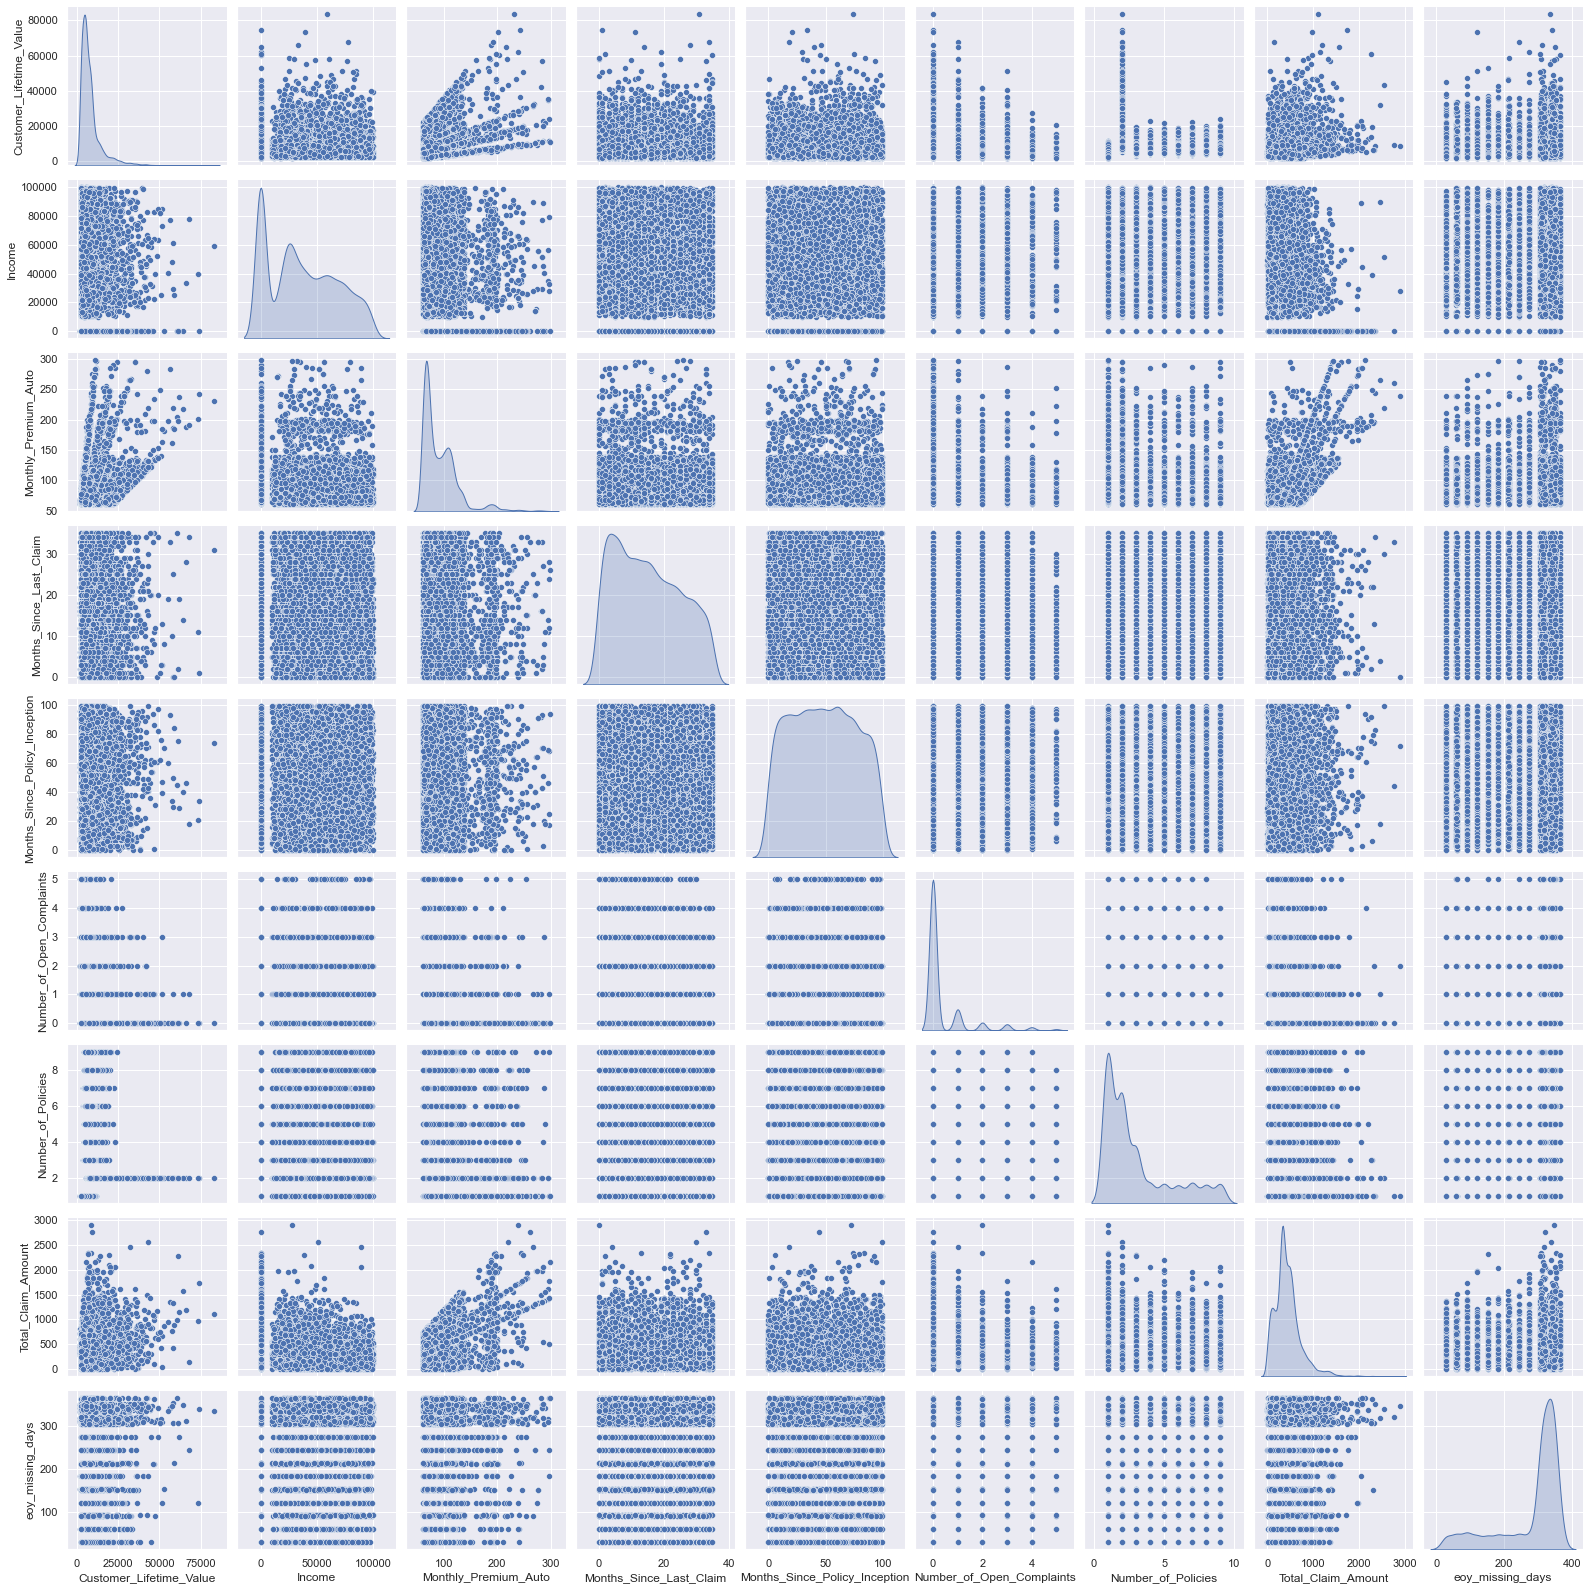

In [37]:
# Bivariate analysis with scatter-plot matrix
sns.pairplot(num2, kind ='scatter',diag_kind='kde')
plt.show()

In [38]:
df_month = df_new.copy()
df_month['month'] = pd.DatetimeIndex(df_month['Effective_Date']).month
# groupby month 
df_month_ = df_month.groupby(['month'], as_index=False)['Monthly_Premium_Auto'].sum()
df_month_['PERCENTAGE'] = df_month_['Monthly_Premium_Auto']/df_month_['Monthly_Premium_Auto'].sum()*100
# dropping not matching rows
df_month_ = df_month_.dropna()
# ranking month 
df_month_pr = df_month_.sort_values(['Monthly_Premium_Auto'], ascending = False).reset_index(drop=True)
variable = 'month'
print('Top {} with the most Monthly_Premium_Auto'.format(variable))
df_month_pr.head(12).style.background_gradient(cmap='winter').format({'PERCENTAGE': "{:.2f}"}).format({'Monthly_Premium_Auto':"{:,.2f}"})


Top month with the most Monthly_Premium_Auto


,month,Monthly_Premium_Auto,PERCENTAGE
0,1,"311,719.00",36.61
1,2,"254,472.00",29.89
2,10,"34,505.00",4.05
3,5,"31,167.00",3.66
4,3,"29,814.00",3.50
5,11,"28,941.00",3.40
6,7,"28,218.00",3.31
7,8,"27,201.00",3.19
8,4,"26,964.00",3.17
9,6,"26,891.00",3.16


Top month with the most Monthly_Premium_Auto


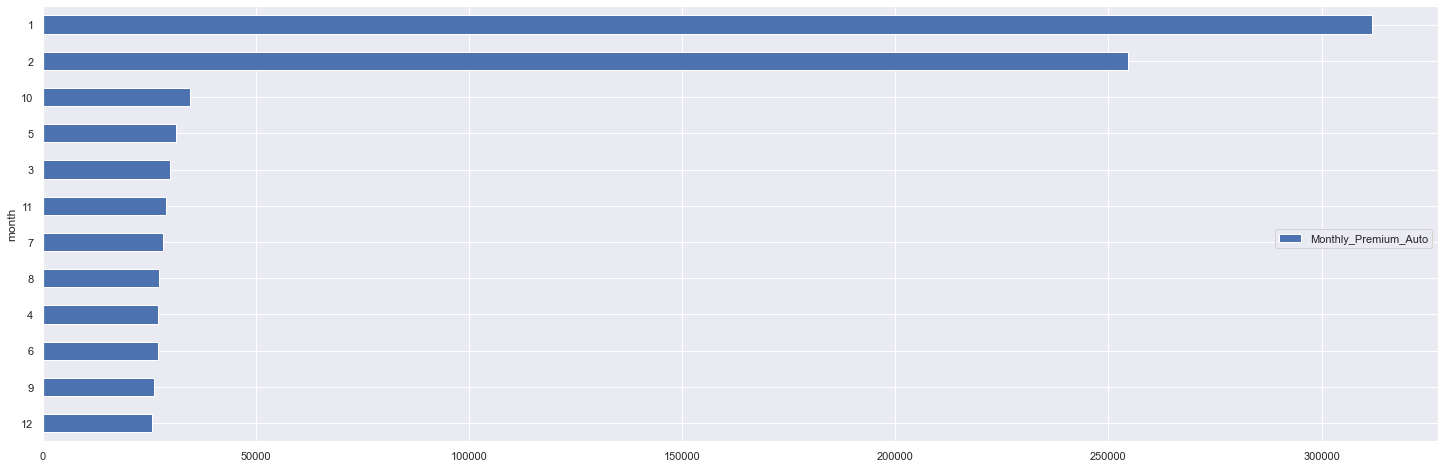

In [39]:
# barplot Top month 
month_ = df_month_pr[['month','Monthly_Premium_Auto']][0:12].sort_values(by = "Monthly_Premium_Auto", ascending = True).set_index('month').plot.barh()
variable = 'month'
print('Top {} with the most Monthly_Premium_Auto'.format(variable))
plt.xticks(rotation=0)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


In [40]:
df_month = df_new.copy()
df_month['month'] = pd.DatetimeIndex(df_month['Effective_Date']).month
# groupby month 
df_month_ = df_month.groupby(['month'], as_index=False)['Total_Claim_Amount'].sum()
df_month_['PERCENTAGE'] = df_month_['Total_Claim_Amount']/df_month_['Total_Claim_Amount'].sum()*100
# dropping not matching rows
df_month_ = df_month_.dropna()
# ranking month 
df_month_cl= df_month_.sort_values(['Total_Claim_Amount'], ascending = False).reset_index(drop=True)
variable = 'month'
print('Top {} with the most Total_Claim_Amount'.format(variable))
df_month_cl.head(12).style.background_gradient(cmap='winter').format({'PERCENTAGE': "{:.2f}"}).format({'Total_Claim_Amount':"{:,.2f}"})


Top month with the most Total_Claim_Amount


,month,Total_Claim_Amount,PERCENTAGE
0,1,"1,459,892.18",36.82
1,2,"1,192,435.21",30.07
2,10,"161,372.74",4.07
3,5,"147,702.00",3.73
4,3,"136,096.81",3.43
5,11,"129,960.58",3.28
6,6,"129,265.86",3.26
7,7,"128,460.64",3.24
8,4,"126,455.95",3.19
9,8,"123,748.76",3.12


Top month with the most Total_Claim_Amount


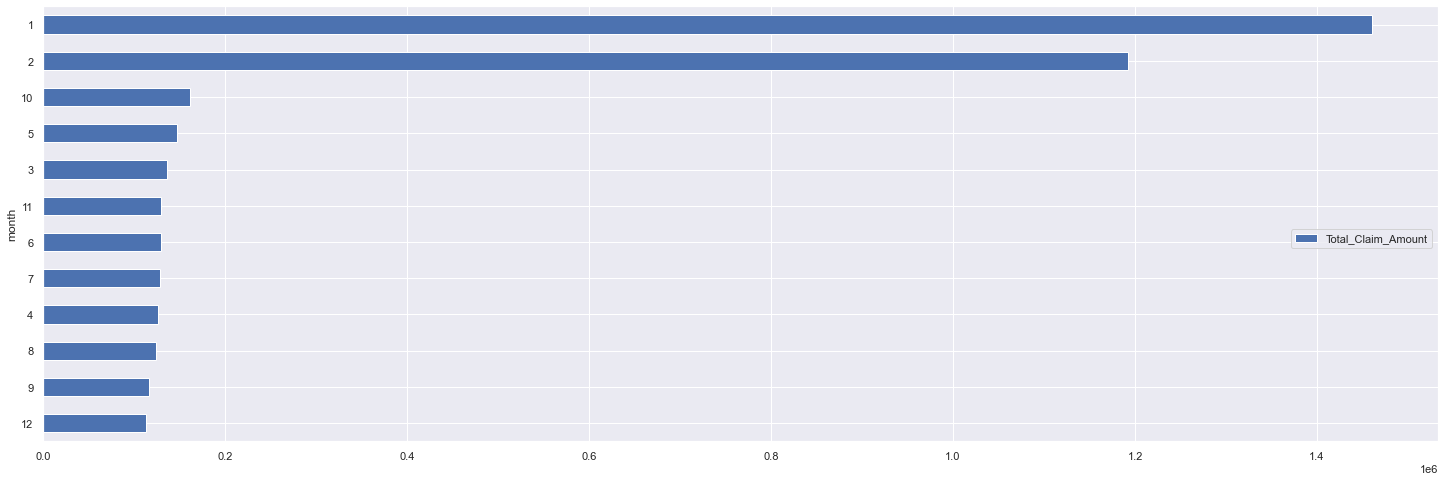

In [41]:
# barplot Top month 
month_ = df_month_cl[['month','Total_Claim_Amount']][0:12].sort_values(by = "Total_Claim_Amount", ascending = True).set_index('month').plot.barh()
variable = 'month'
print('Top {} with the most Total_Claim_Amount'.format(variable))
plt.xticks(rotation=0)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


In [42]:
df_month = df_new.copy()
df_month['month'] = pd.DatetimeIndex(df_month['Effective_Date']).month
# groupby month 
df_month_ = df_month.groupby(['month'], as_index=False)['Number_of_Policies'].sum()
df_month_['PERCENTAGE'] = df_month_['Number_of_Policies']/df_month_['Number_of_Policies'].sum()*100
# dropping not matching rows
df_month_ = df_month_.dropna()
# ranking month 
df_month_pol= df_month_.sort_values(['Number_of_Policies'], ascending = False).reset_index(drop=True)
variable = 'month'
print('Top {} with the most Number_of_Policies'.format(variable))
df_month_pol.head(12).style.background_gradient(cmap='winter').format({'PERCENTAGE': "{:.2f}"}).format({'Number_of_Policies':"{:,.2f}"})


Top month with the most Number_of_Policies


,month,Number_of_Policies,PERCENTAGE
0,1,"9,969.00",36.80
1,2,"8,169.00",30.15
2,10,"1,015.00",3.75
3,3,"1,001.00",3.69
4,5,947.00,3.50
5,11,914.00,3.37
6,7,893.00,3.30
7,9,893.00,3.30
8,4,875.00,3.23
9,6,854.00,3.15


Top month with the most Number_of_Policies


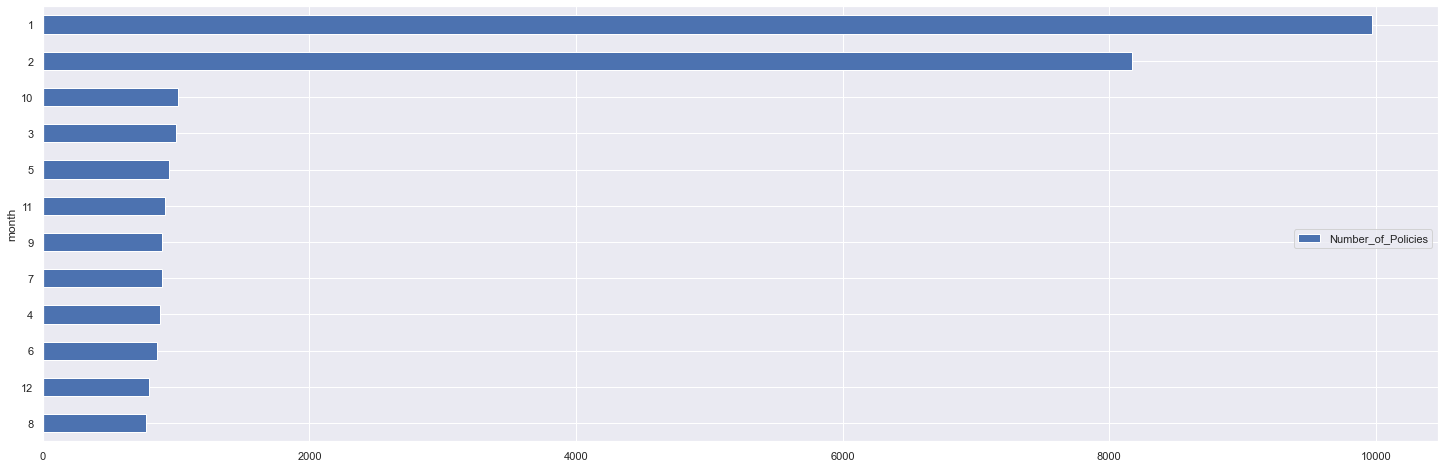

In [43]:
# barplot Top month 
month_ = df_month_pol[['month','Number_of_Policies']][0:12].sort_values(by = "Number_of_Policies", ascending = True).set_index('month').plot.barh()
variable = 'month'
print('Top {} with the most Number_of_Policies'.format(variable))
plt.xticks(rotation=0)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


### Dimensionality Reduction and Visualization with T-SNE

In [44]:
# Normalization of data
scaling = MinMaxScaler()
num_sc = scaling.fit_transform(num)

In [45]:
tsne = TSNE(n_components=2, random_state=0).fit_transform(num_sc)

In [46]:
tsne_df = pd.DataFrame(data = tsne, columns = ['x','y'], index=num.index)

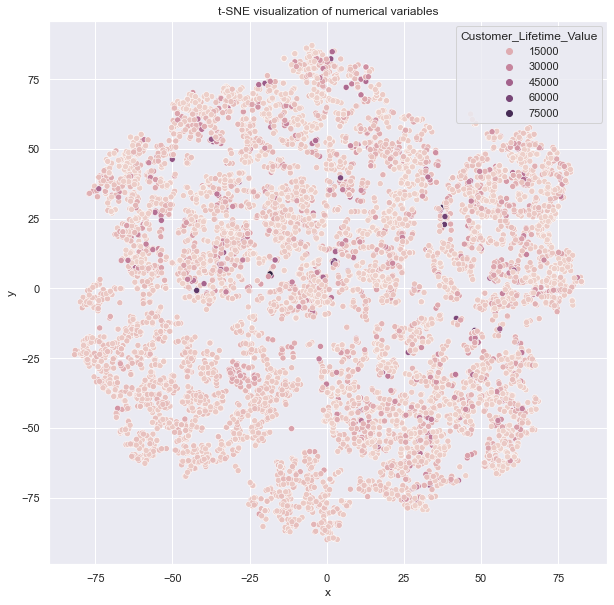

In [47]:
dff = pd.concat([df_new['Customer_Lifetime_Value'], tsne_df], axis=1)
# Show the diagram
fig = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='x',y='y',hue='Customer_Lifetime_Value',data=dff)
plt.title('t-SNE visualization of numerical variables')
plt.show()

# Categorical Features Analysis

### Analysis for categorical features (univariate analysis, bivariate analysis)

In [48]:
# let's have a look at how many labels for categorical features
for col in X_full.columns:
    if X_full[col].dtype =="object":
        print(col, ': ', len(X_full[col].unique()), ' labels')

State :  5  labels
Response :  2  labels
Coverage :  3  labels
Education :  5  labels
EmploymentStatus :  5  labels
Gender :  2  labels
Location_Code :  3  labels
Marital_Status :  3  labels
Policy_Type :  3  labels
Policy :  9  labels
Renew_Offer_Type :  4  labels
Sales_Channel :  4  labels
Vehicle_Class :  6  labels
Vehicle_Size :  3  labels


In [49]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_full.columns if
                    X_full[cname].nunique() <= 15 and 
                    X_full[cname].dtype == "object"]

In [50]:
# Subset with categorical features
cat = X_full[categorical_cols]
cat.columns


Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location_Code', 'Marital_Status', 'Policy_Type', 'Policy',
       'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [51]:
# List of categorical features
fcat = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location_Code', 'Marital_Status', 'Policy_Type', 'Policy',
       'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size']

In [52]:
# Univariate analysis looking at frequency
for col in fcat:
    count = pd.crosstab(index = cat[col], columns="count")
    percentage = pd.crosstab(index = cat[col], columns="frequency")/pd.crosstab(index = cat[col], columns="frequency").sum()
    tab = pd.concat([count, percentage], axis=1)
    print('\n',tab)


 col_0       count  frequency
State                       
Arizona      1703   0.186446
California   3150   0.344865
Nevada        882   0.096562
Oregon       2601   0.284760
Washington    798   0.087366

 col_0     count  frequency
Response                  
No         7826   0.856799
Yes        1308   0.143201

 col_0     count  frequency
Coverage                  
Basic      5568   0.609591
Extended   2742   0.300197
Premium     824   0.090212

 col_0                 count  frequency
Education                             
Bachelor               2748   0.300854
College                2681   0.293519
Doctor                  342   0.037443
High School or Below   2622   0.287059
Master                  741   0.081125

 col_0             count  frequency
EmploymentStatus                  
Disabled            405   0.044340
Employed           5698   0.623823
Medical Leave       432   0.047296
Retired             282   0.030874
Unemployed         2317   0.253668

 col_0   count  frequency

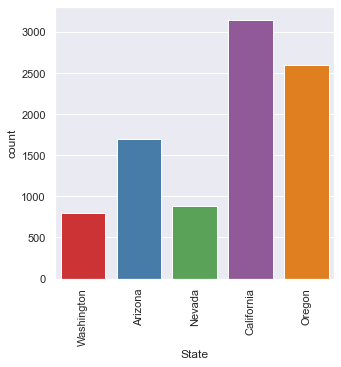

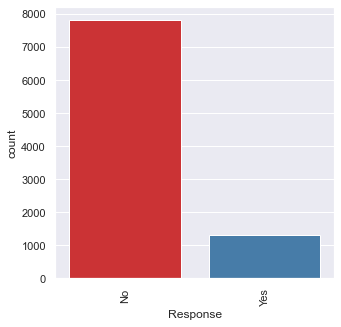

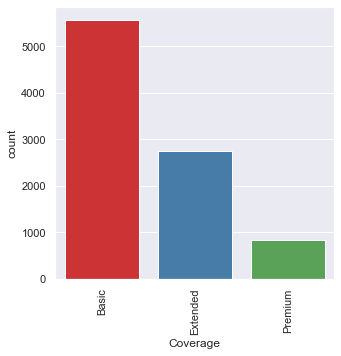

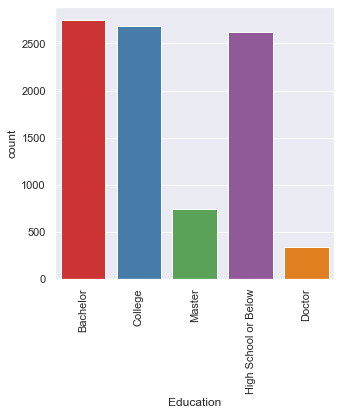

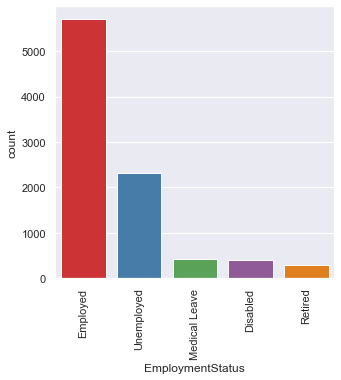

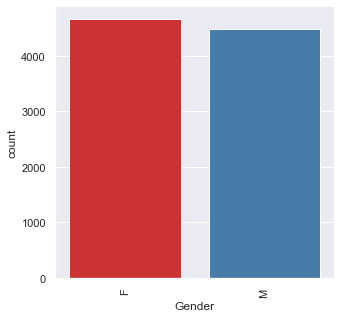

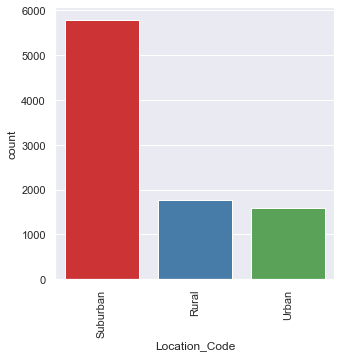

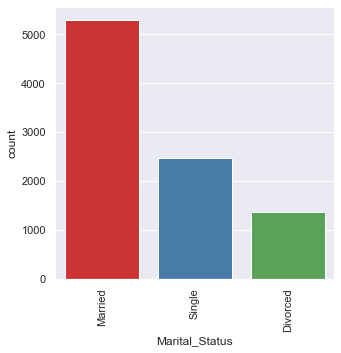

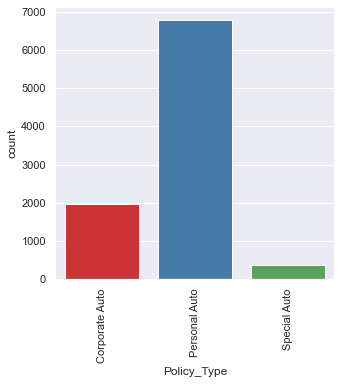

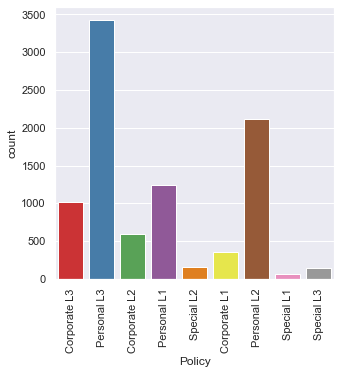

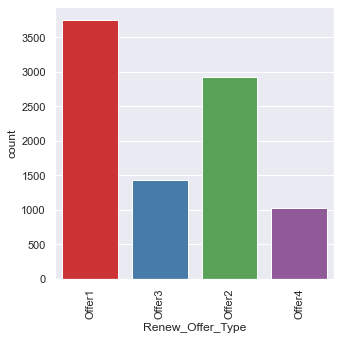

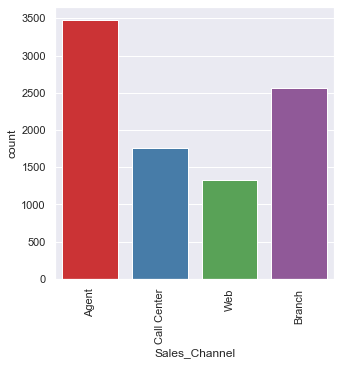

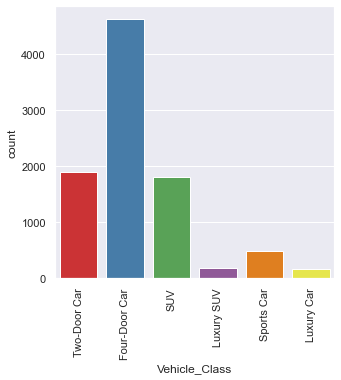

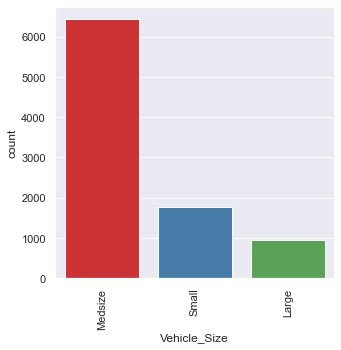

In [53]:
# Univariate analysis with barplots

for col in fcat:
    plt.figure(figsize=(5,5))
    sns.countplot(x=cat[col], data=cat, palette="Set1")
    plt.xticks(rotation=90)
    plt.show()

In [54]:
# new subset for a bivariate analysis
cat2 = pd.concat([y,cat], axis=1)

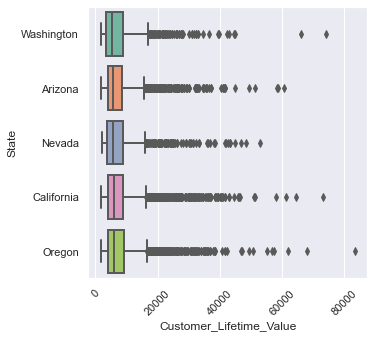

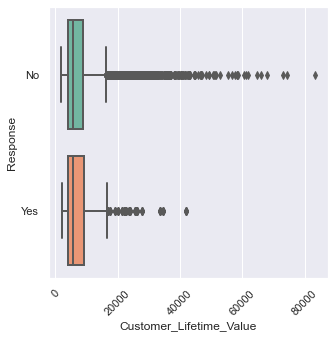

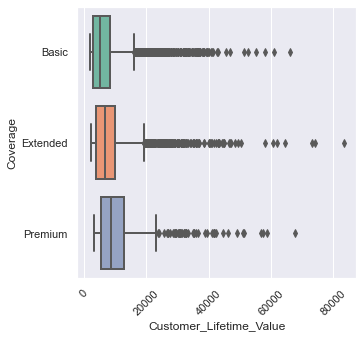

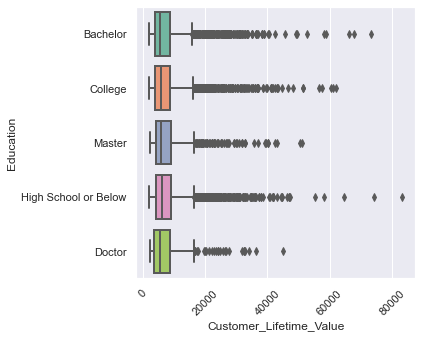

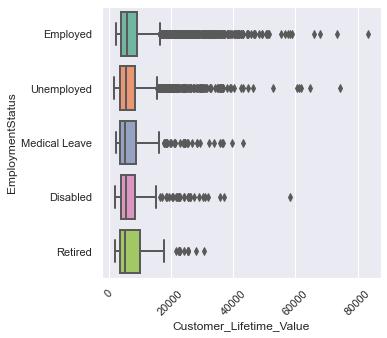

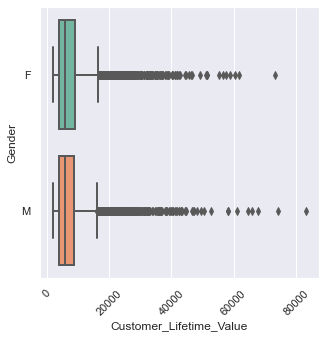

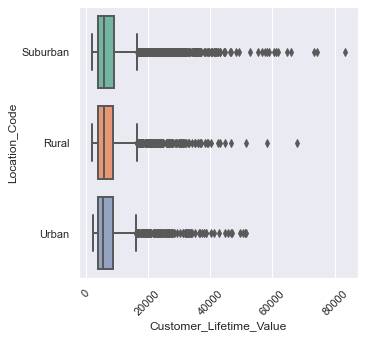

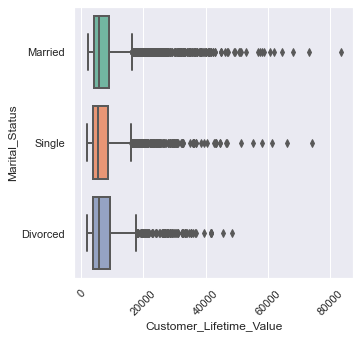

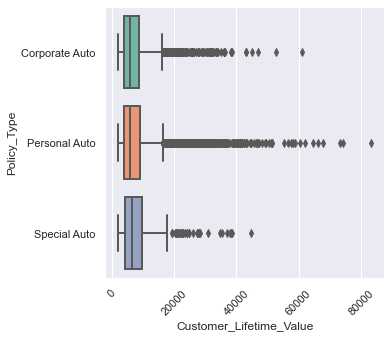

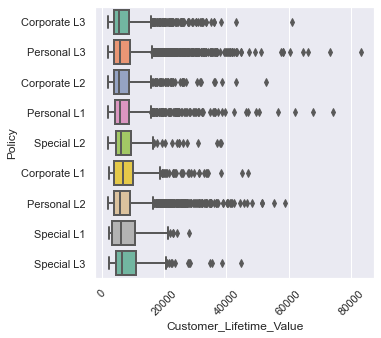

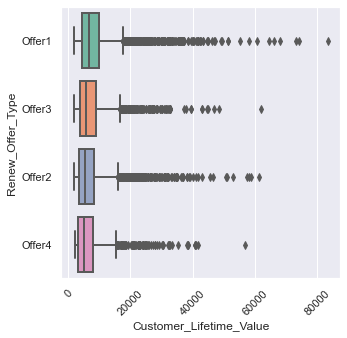

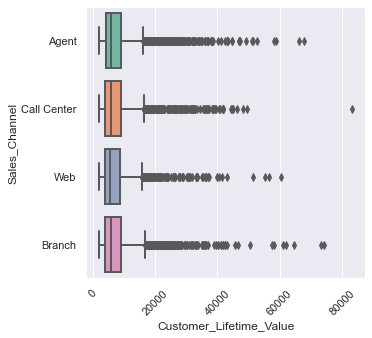

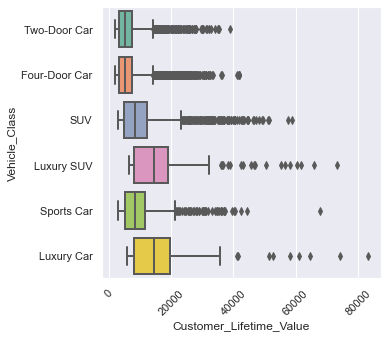

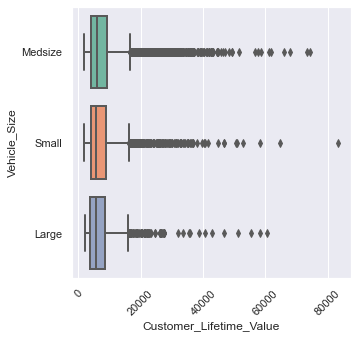

In [55]:
# Bivariate analysis with box-plots
for col in fcat:
    plt.figure(figsize=(5,5))
    sns.boxplot(y=cat2[col], x=cat2['Customer_Lifetime_Value'], linewidth=2, palette="Set2")
    plt.xticks(rotation=45)
    plt.show()

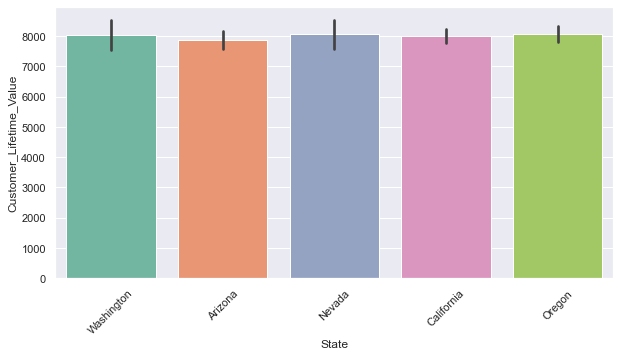

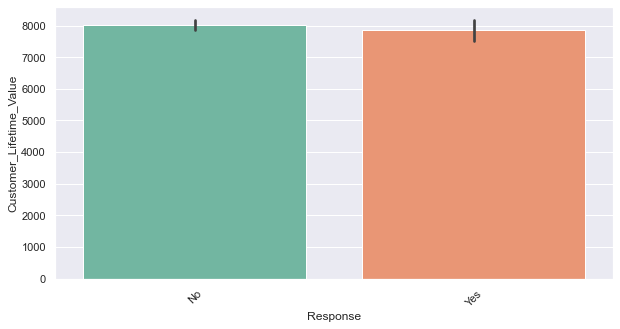

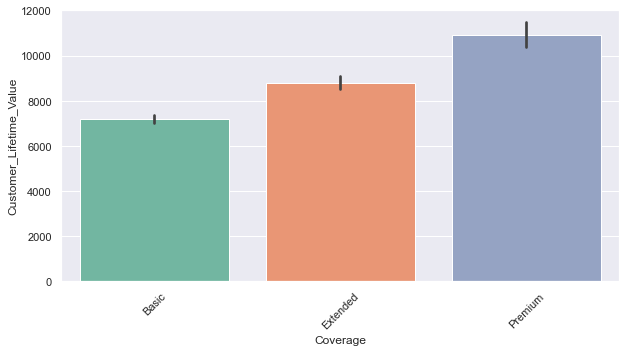

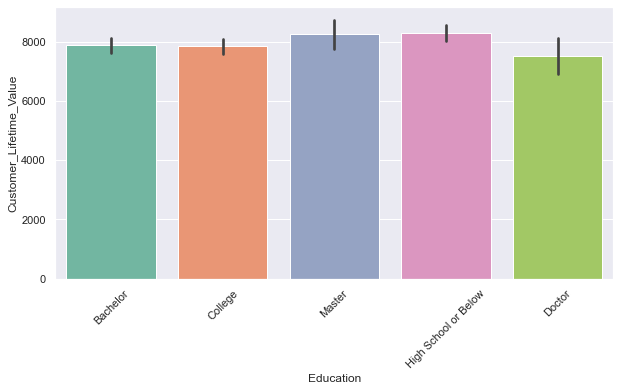

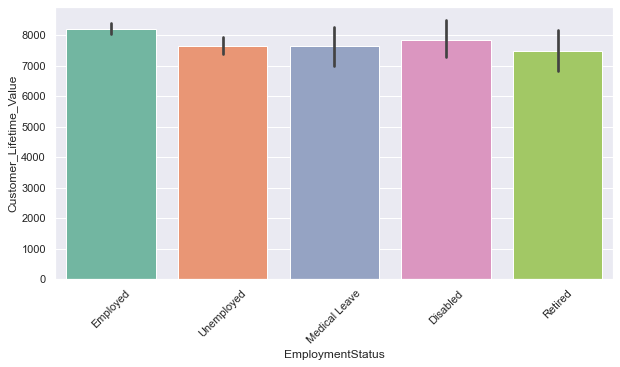

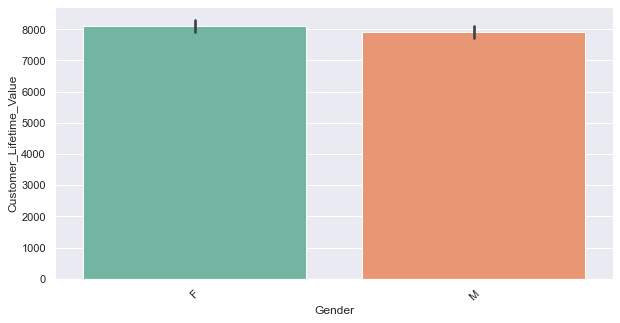

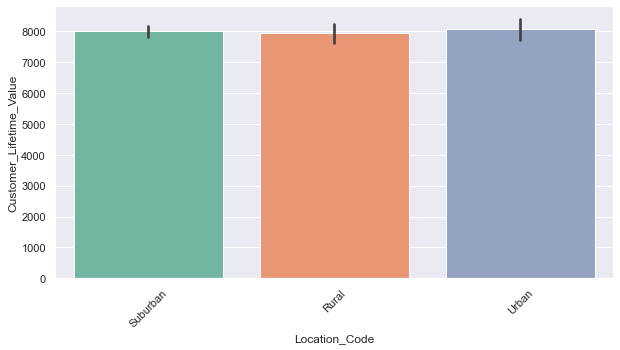

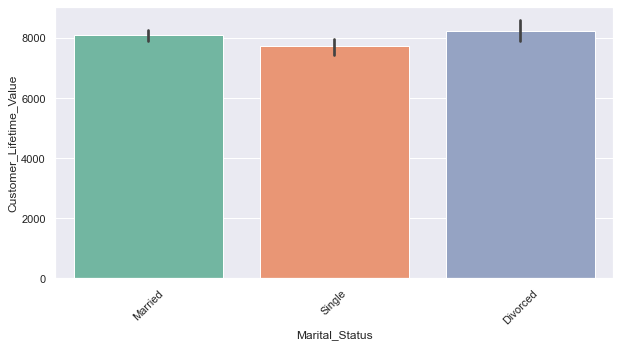

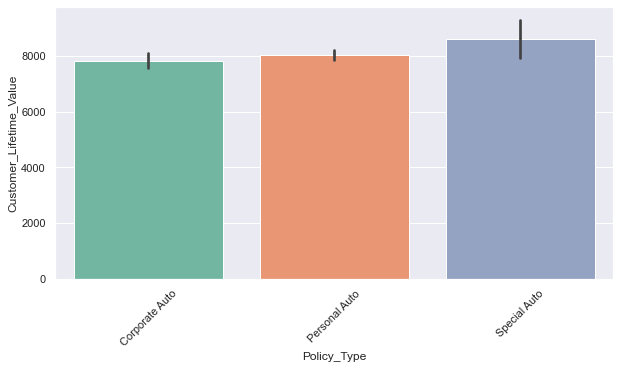

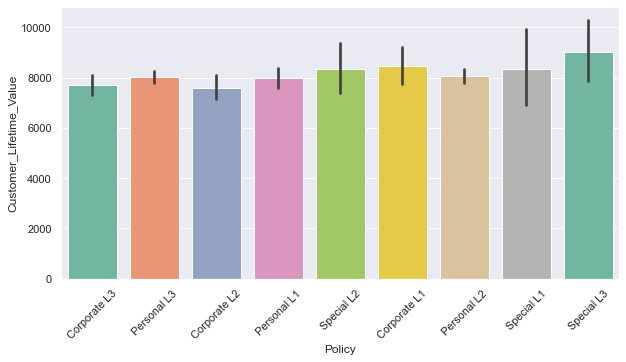

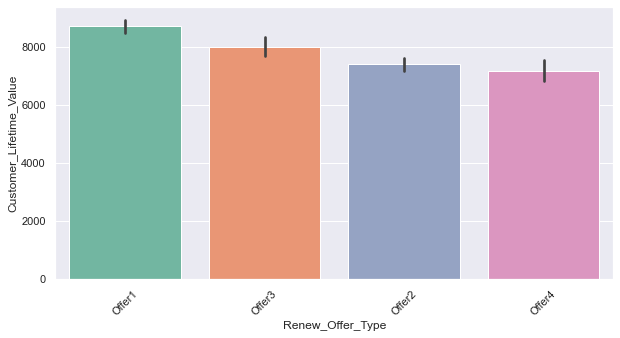

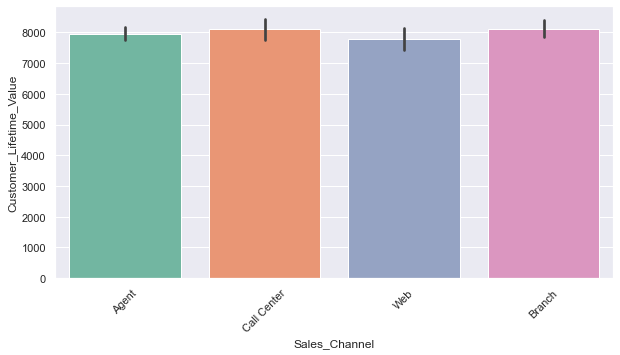

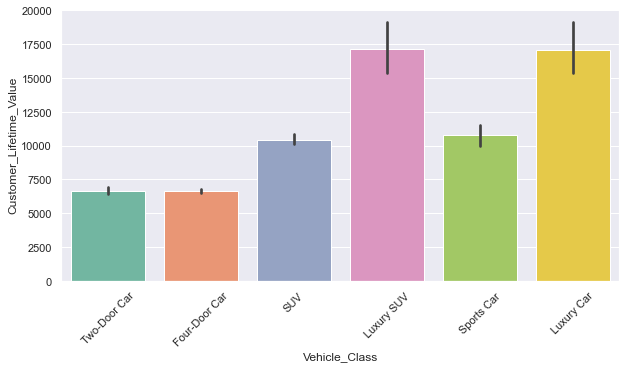

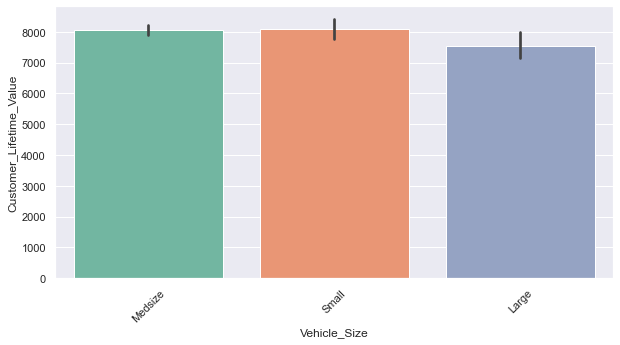

In [56]:
# Bivariate analysis with barplots
for col in fcat:
    plt.figure(figsize=(10,5))
    sns.barplot(y=cat2['Customer_Lifetime_Value'], x=cat2[col], palette="Set2")
    plt.xticks(rotation=45)
    plt.show()

In [57]:
# Function for query and barplot about Customer_Lifetime_Value per each class of variable
def query(data,col):
    # groupby
    df = data.groupby(data[col], as_index=False)['Customer_Lifetime_Value'].sum()
    df['PERCENTAGE'] = df['Customer_Lifetime_Value']/df['Customer_Lifetime_Value'].sum()*100
    # dropping not matching rows
    df = df.dropna()
    # ranking 
    df = df.sort_values(by = 'Customer_Lifetime_Value', ascending = False).reset_index(drop=True)
    df_q = df.style.background_gradient(cmap='winter').format({'PERCENTAGE': "{:.2f}"}).format({'Customer_Lifetime_Value':"{:,.2f}"})
    # barplot
    index=list(df.columns[0:1])
    barplot = df[df.columns[0:2]].sort_values(by = "Customer_Lifetime_Value", ascending = True).set_index(index).plot.barh()
    plt.xticks(rotation=0)
    plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
    return df_q
    plt.show()
    return barplot
    plt.show()

Customer_Lifetime_Value per State


,State,Customer_Lifetime_Value,PERCENTAGE
0,California,"25,211,490.44",34.48
1,Oregon,"21,010,621.00",28.74
2,Arizona,"13,387,864.56",18.31
3,Nevada,"7,106,015.43",9.72
4,Washington,"6,401,134.87",8.75


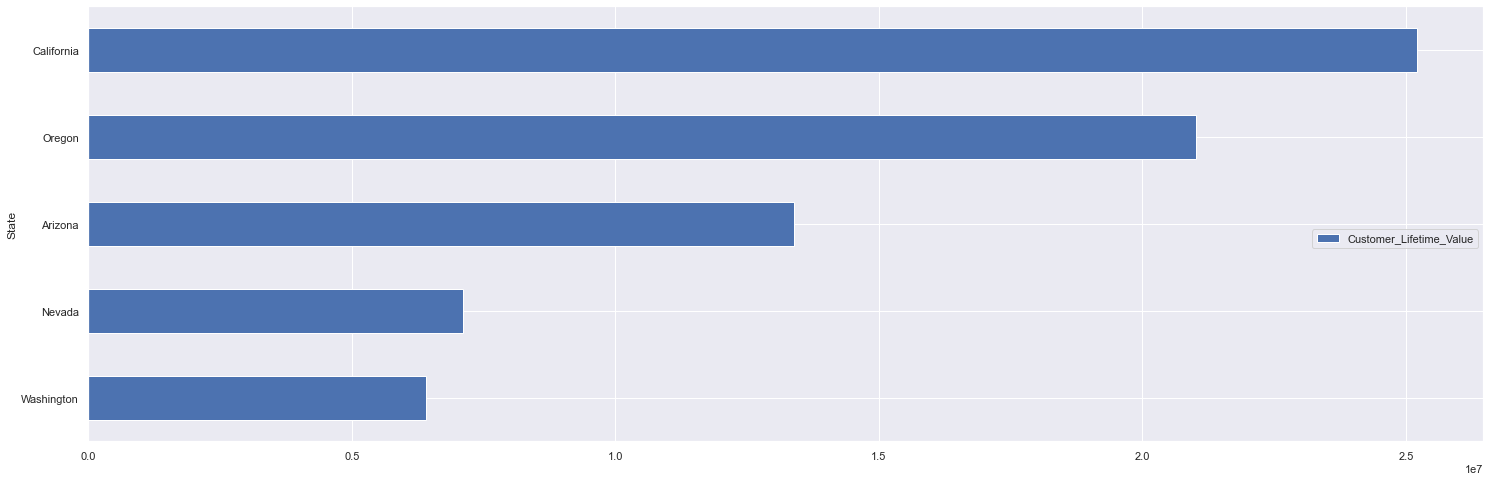

In [58]:
# query and barplot
variable = 'State'
print('Customer_Lifetime_Value per {}'.format(variable))
query(cat2, col='State')

Customer_Lifetime_Value per Response


,Response,Customer_Lifetime_Value,PERCENTAGE
0,No,"62,842,954.56",85.95
1,Yes,"10,274,171.74",14.05


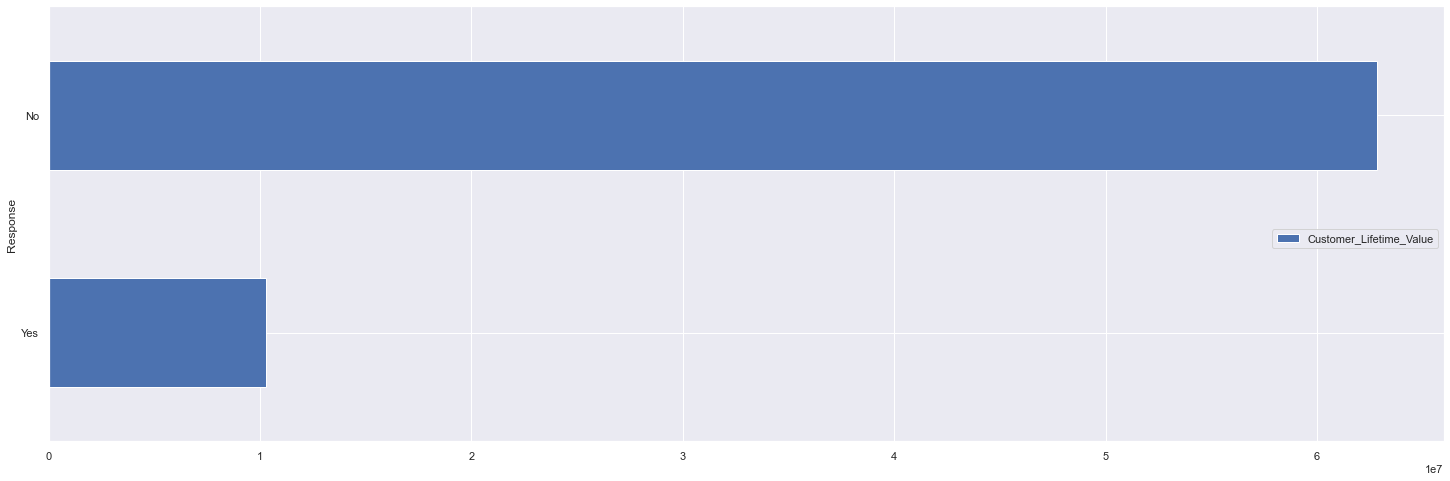

In [59]:
# query and barplot
variable = 'Response'
print('Customer_Lifetime_Value per {}'.format(variable))
query(cat2, col='Response')

Customer_Lifetime_Value per Coverage


,Coverage,Customer_Lifetime_Value,PERCENTAGE
0,Basic,"40,037,853.36",54.76
1,Extended,"24,101,296.00",32.96
2,Premium,"8,977,976.94",12.28


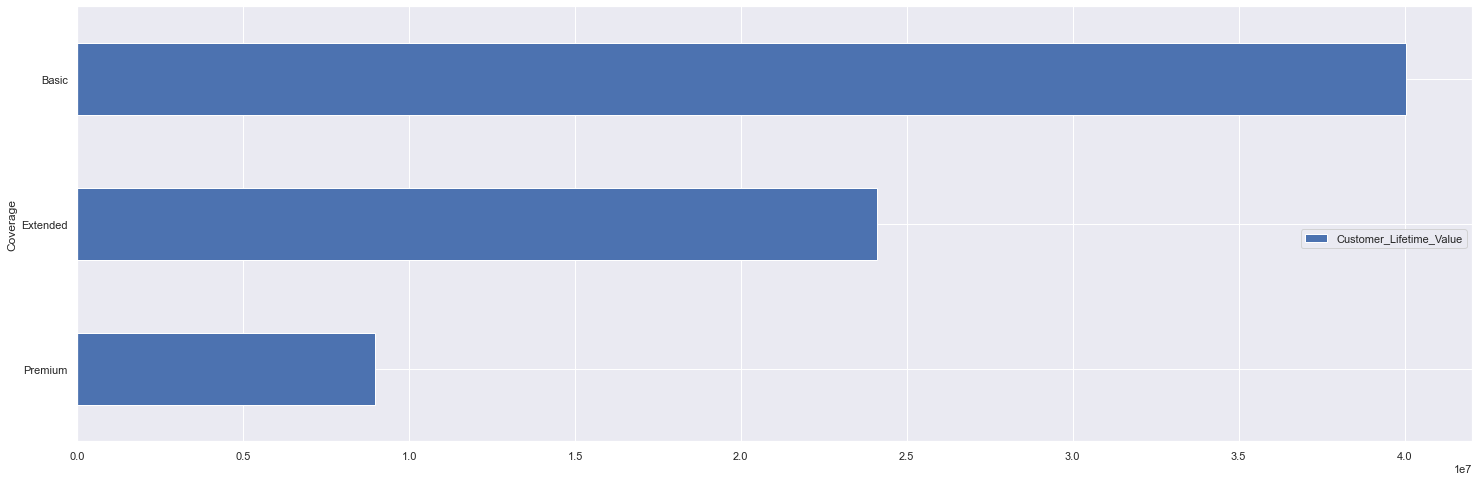

In [60]:
# query and barplot
variable = 'Coverage'
print('Customer_Lifetime_Value per {}'.format(variable))
query(cat2, col='Coverage')

Customer_Lifetime_Value per Education


,Education,Customer_Lifetime_Value,PERCENTAGE
0,High School or Below,"21,753,971.08",29.75
1,Bachelor,"21,634,070.81",29.59
2,College,"21,048,704.31",28.79
3,Master,"6,108,422.16",8.35
4,Doctor,"2,571,957.93",3.52


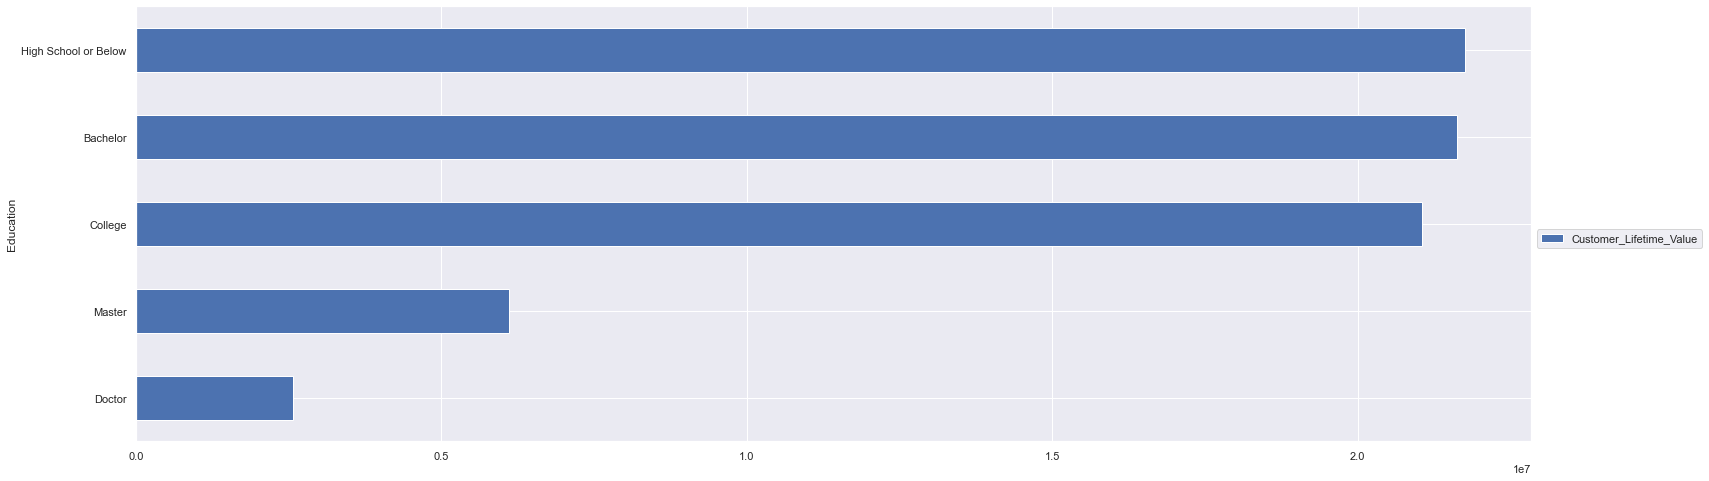

In [61]:
# query and barplot
variable = 'Education'
print('Customer_Lifetime_Value per {}'.format(variable))
query(cat2, col='Education')

Customer_Lifetime_Value per EmploymentStatus


,EmploymentStatus,Customer_Lifetime_Value,PERCENTAGE
0,Employed,"46,832,532.96",64.05
1,Unemployed,"17,693,352.89",24.20
2,Medical Leave,"3,301,267.29",4.52
3,Disabled,"3,178,395.19",4.35
4,Retired,"2,111,577.97",2.89


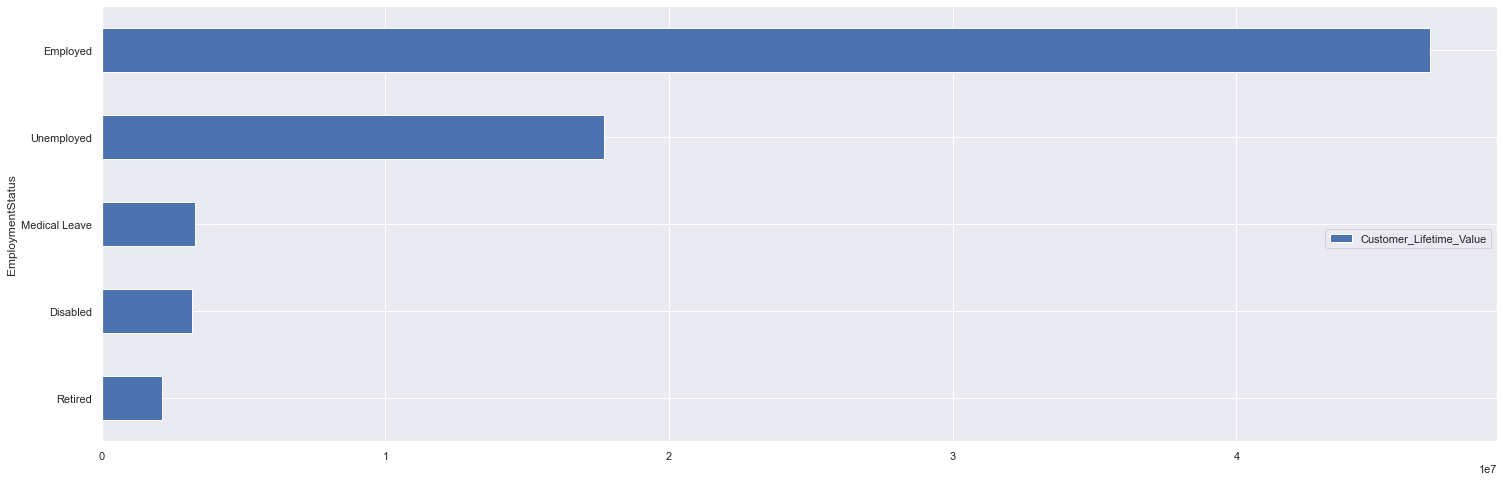

In [62]:
# query and barplot
variable = 'EmploymentStatus'
print('Customer_Lifetime_Value per {}'.format(variable))
query(cat2, col='EmploymentStatus')

Customer_Lifetime_Value per Gender


,Gender,Customer_Lifetime_Value,PERCENTAGE
0,F,"37,713,973.84",51.58
1,M,"35,403,152.46",48.42


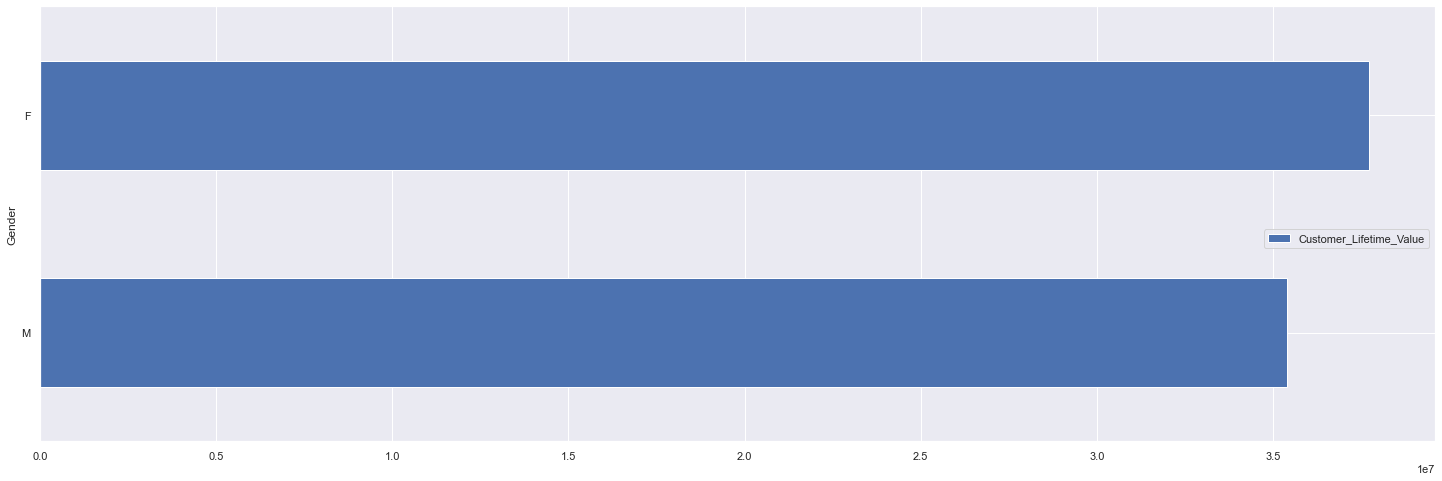

In [63]:
# query and barplot
variable = 'Gender'
print('Customer_Lifetime_Value per {}'.format(variable))
query(cat2, col='Gender')

Customer_Lifetime_Value per Location_Code


,Location_Code,Customer_Lifetime_Value,PERCENTAGE
0,Suburban,"46,257,759.40",63.27
1,Rural,"14,101,908.60",19.29
2,Urban,"12,757,458.29",17.45


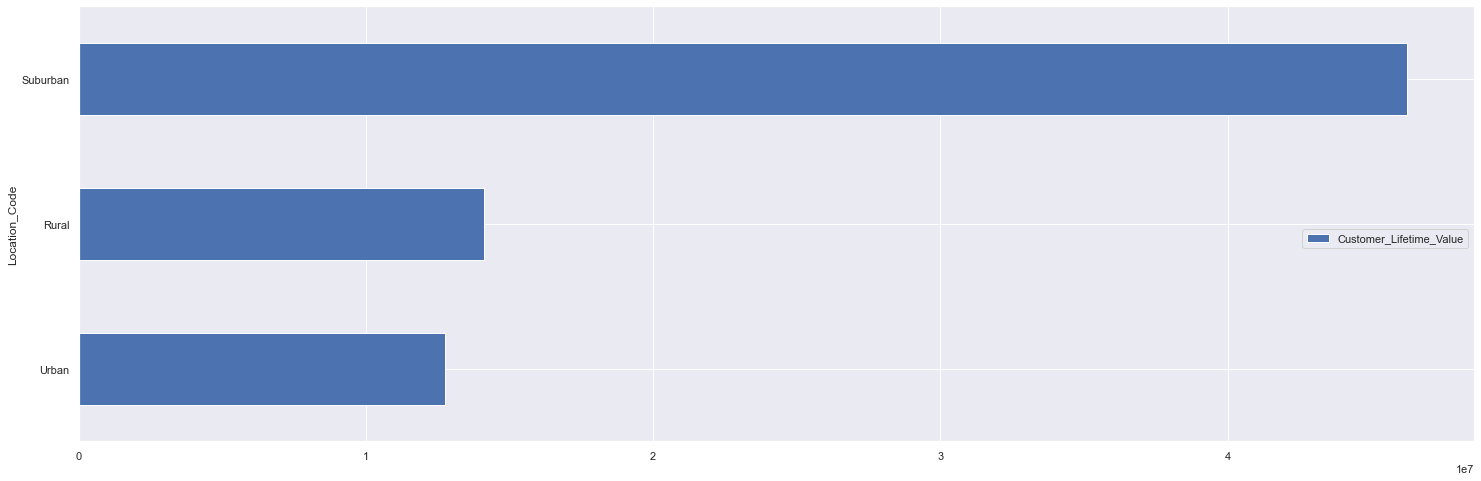

In [64]:
# query and barplot
variable = 'Location_Code'
print('Customer_Lifetime_Value per {}'.format(variable))
query(cat2, col='Location_Code')

Customer_Lifetime_Value per Marital_Status


,Marital_Status,Customer_Lifetime_Value,PERCENTAGE
0,Married,"42,802,367.00",58.54
1,Single,"19,032,502.92",26.03
2,Divorced,"11,282,256.38",15.43


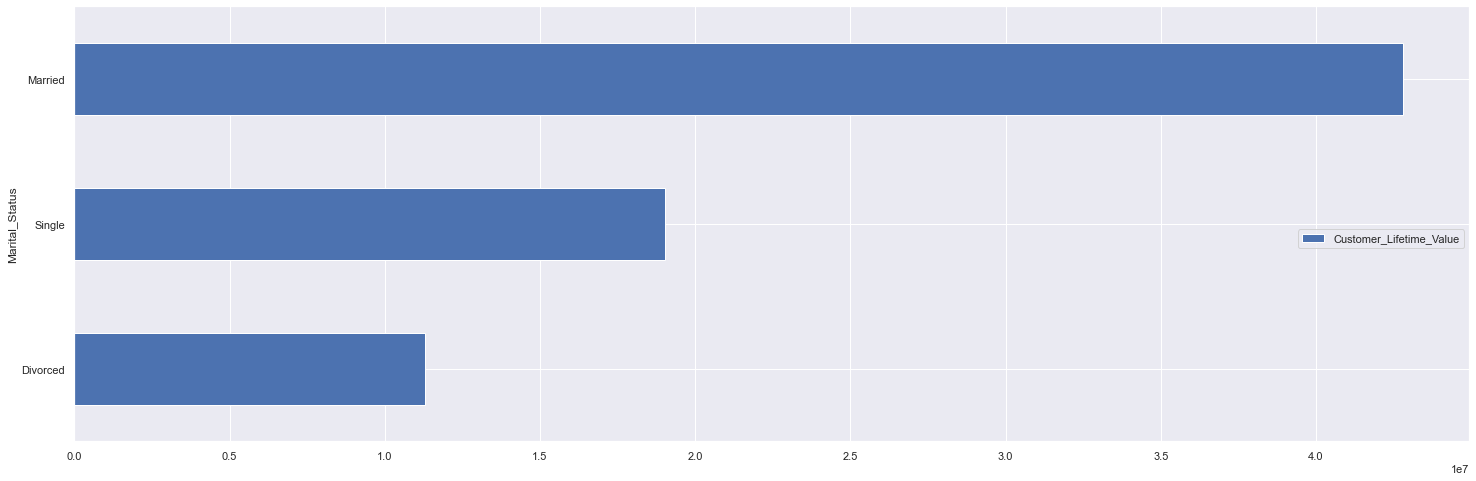

In [65]:
# query and barplot
variable = 'Marital_Status'
print('Customer_Lifetime_Value per {}'.format(variable))
query(cat2, col='Marital_Status')

Customer_Lifetime_Value per Policy_Type


,Policy_Type,Customer_Lifetime_Value,PERCENTAGE
0,Personal Auto,"54,489,743.68",74.52
1,Corporate Auto,"15,378,758.00",21.03
2,Special Auto,"3,248,624.62",4.44


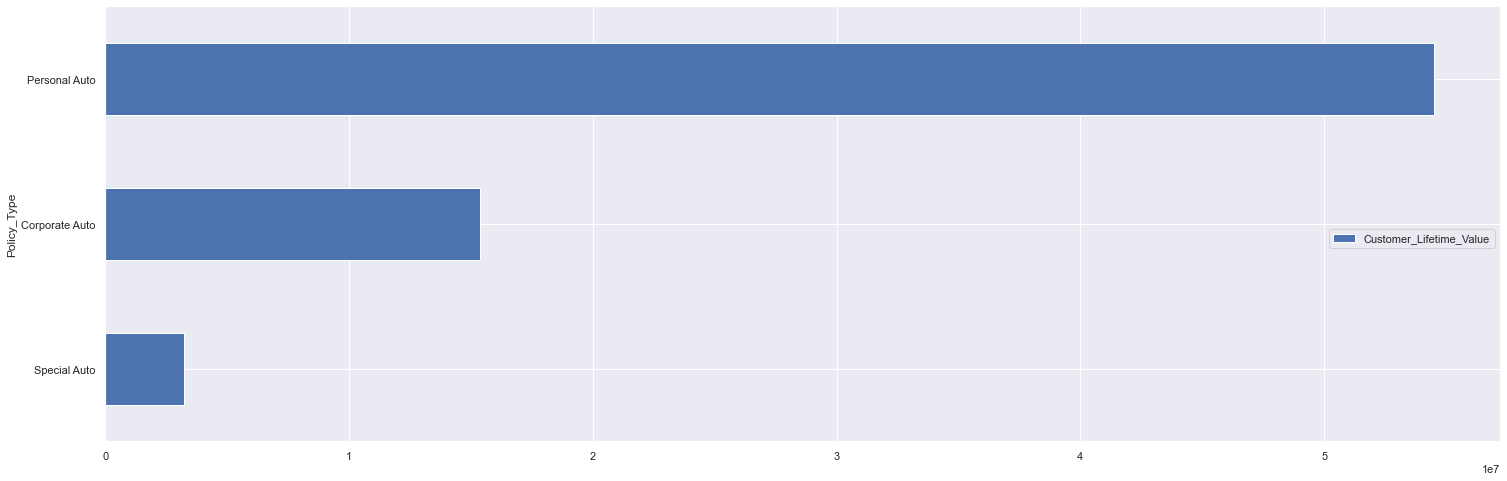

In [66]:
# query and barplot
variable = 'Policy_Type'
print('Customer_Lifetime_Value per {}'.format(variable))
query(cat2, col='Policy_Type')

Customer_Lifetime_Value per Policy


,Policy,Customer_Lifetime_Value,PERCENTAGE
0,Personal L3,"27,489,921.15",37.60
1,Personal L2,"17,092,517.62",23.38
2,Personal L1,"9,907,304.90",13.55
3,Corporate L3,"7,815,630.07",10.69
4,Corporate L2,"4,520,628.70",6.18
5,Corporate L1,"3,042,499.23",4.16
6,Special L2,"1,365,612.64",1.87
7,Special L3,"1,333,049.61",1.82
8,Special L1,"549,962.37",0.75


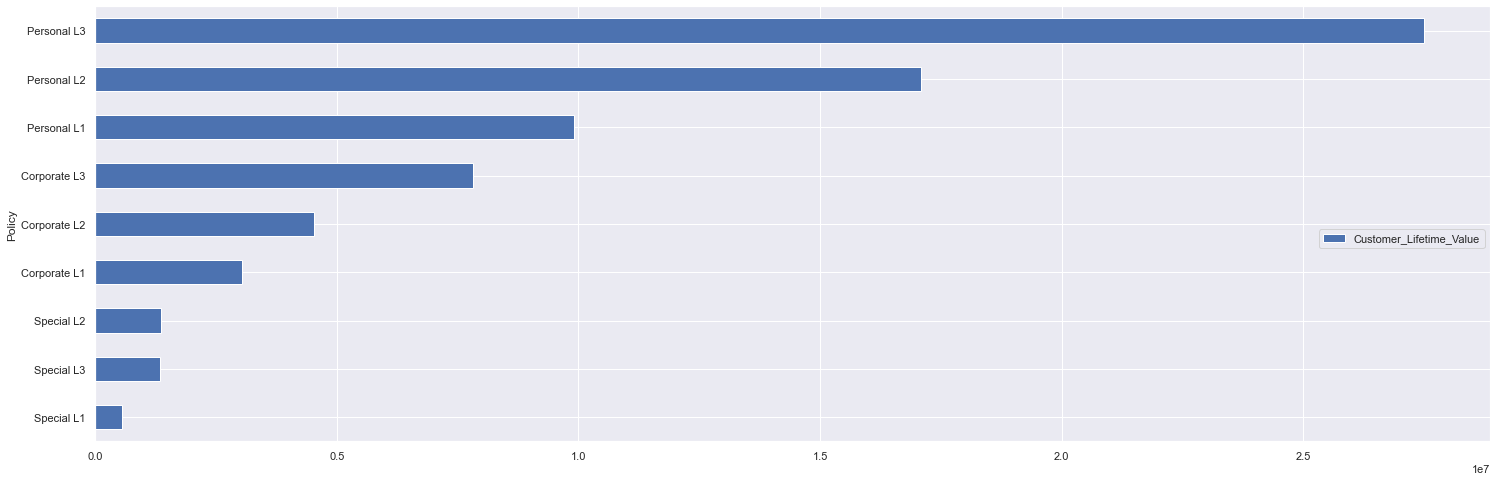

In [67]:
# query and barplot
variable = 'Policy'
print('Customer_Lifetime_Value per {}'.format(variable))
query(cat2, col='Policy')

Customer_Lifetime_Value per Renew_Offer_Type


,Renew_Offer_Type,Customer_Lifetime_Value,PERCENTAGE
0,Offer1,"32,668,985.11",44.68
1,Offer2,"21,642,901.70",29.60
2,Offer3,"11,452,973.49",15.66
3,Offer4,"7,352,266.00",10.06


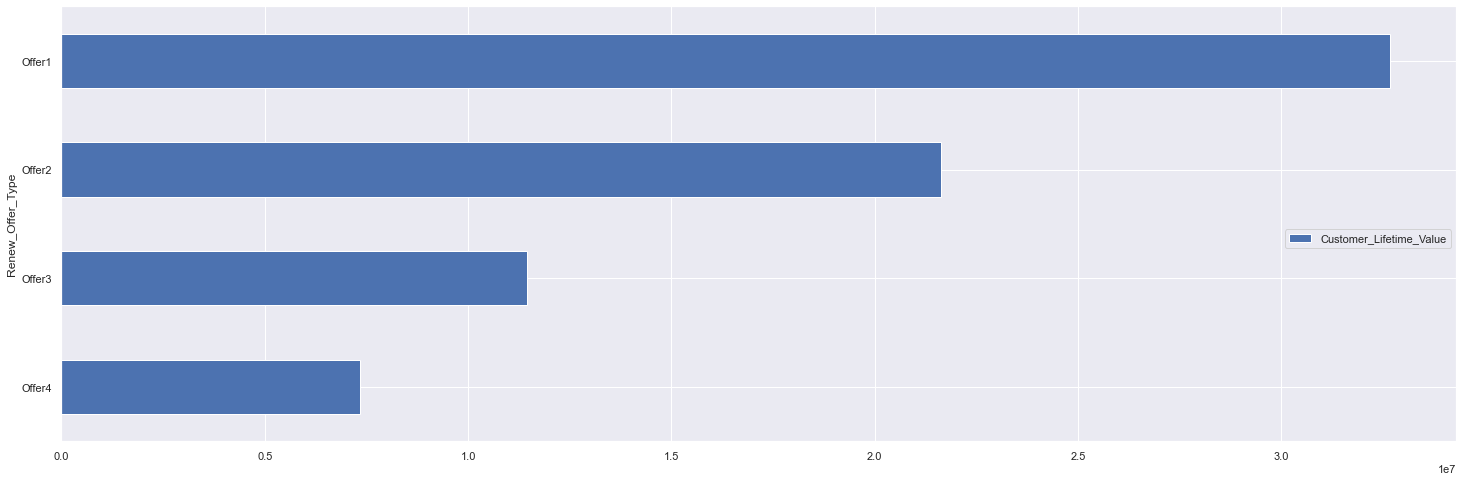

In [68]:
# query and barplot
variable = 'Renew_Offer_Type'
print('Customer_Lifetime_Value per {}'.format(variable))
query(cat2, col='Renew_Offer_Type')

Customer_Lifetime_Value per Sales_Channel


,Sales_Channel,Customer_Lifetime_Value,PERCENTAGE
0,Agent,"27,668,955.42",37.84
1,Branch,"20,843,300.35",28.51
2,Call Center,"14,296,651.35",19.55
3,Web,"10,308,219.18",14.10


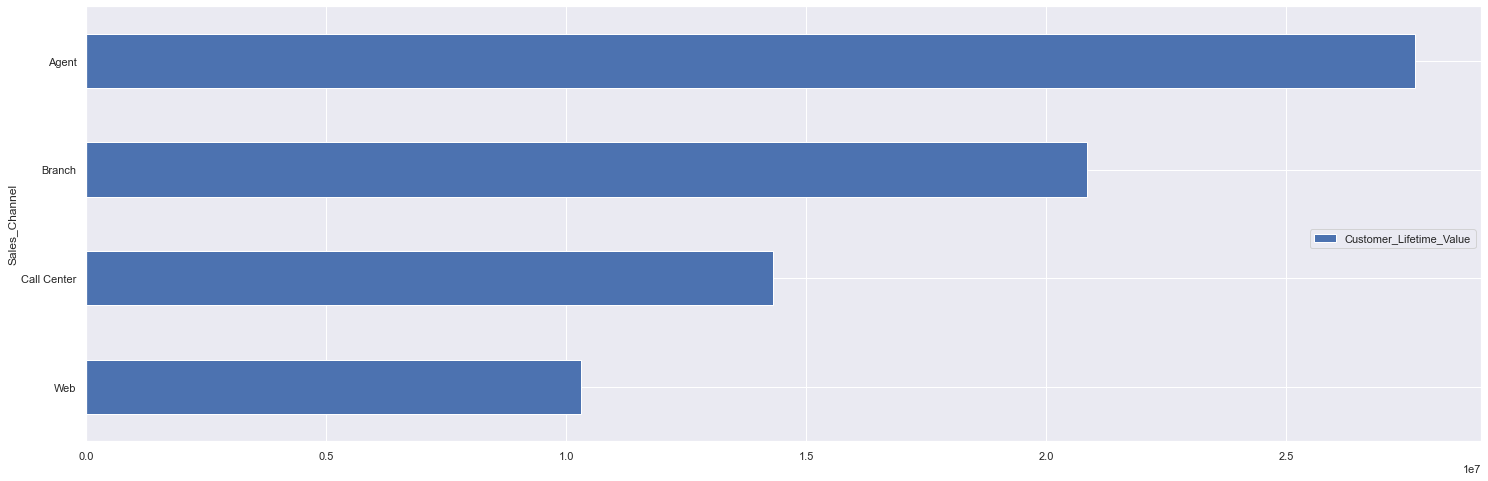

In [69]:
# query and barplot
variable = 'Sales_Channel'
print('Customer_Lifetime_Value per {}'.format(variable))
query(cat2, col='Sales_Channel')

Customer_Lifetime_Value per Vehicle_Class


,Vehicle_Class,Customer_Lifetime_Value,PERCENTAGE
0,Four-Door Car,"30,645,208.65",41.91
1,SUV,"18,756,547.22",25.65
2,Two-Door Car,"12,581,563.96",17.21
3,Sports Car,"5,203,478.84",7.12
4,Luxury SUV,"3,150,631.84",4.31
5,Luxury Car,"2,779,695.79",3.80


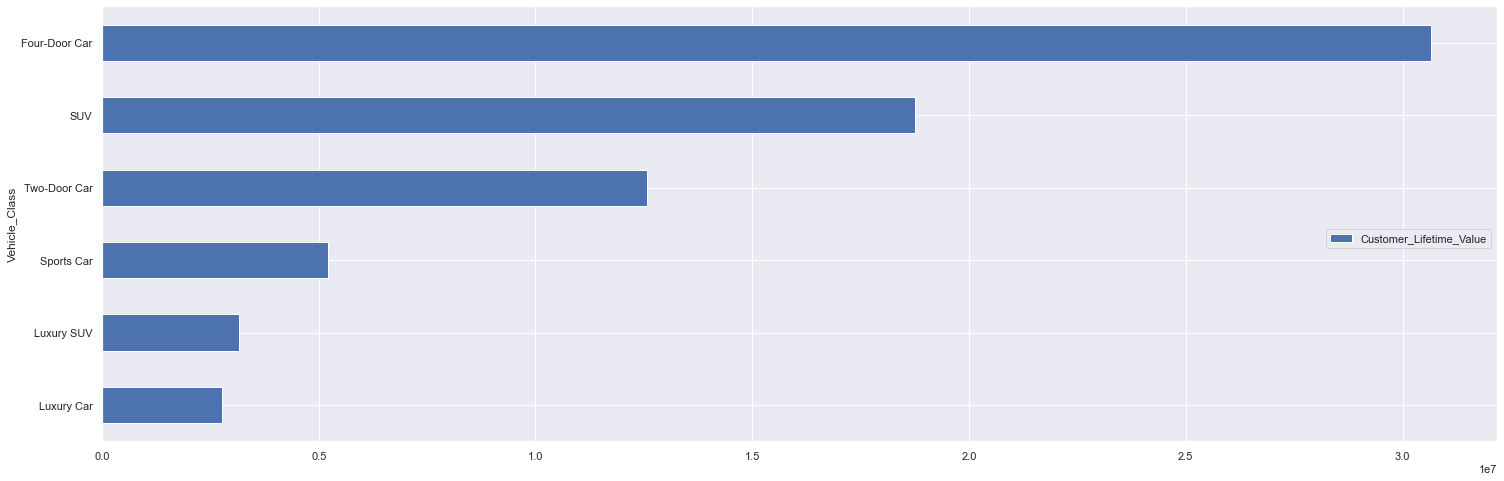

In [70]:
# query and barplot
variable = 'Vehicle_Class'
print('Customer_Lifetime_Value per {}'.format(variable))
query(cat2, col='Vehicle_Class')

Customer_Lifetime_Value per Vehicle_Size


,Vehicle_Size,Customer_Lifetime_Value,PERCENTAGE
0,Medsize,"51,717,451.11",70.73
1,Small,"14,262,109.22",19.51
2,Large,"7,137,565.96",9.76


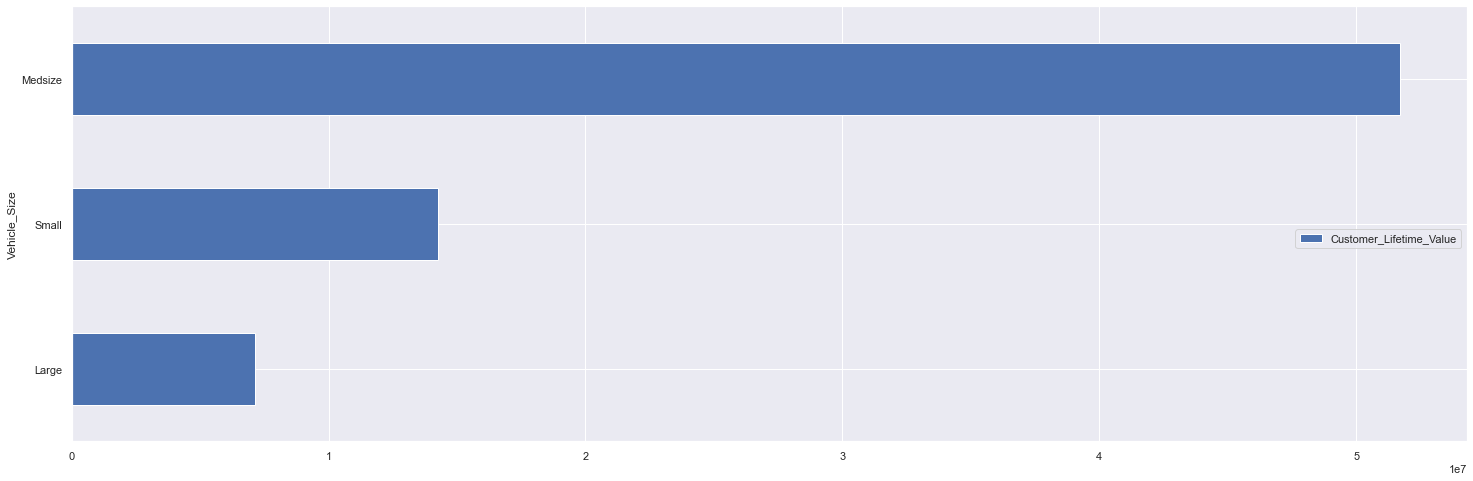

In [71]:
# query and barplot
variable = 'Vehicle_Size'
print('Customer_Lifetime_Value per {}'.format(variable))
query(cat2, col='Vehicle_Size')